In [1]:
import os
import pandas as pd
import numpy as np
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis')
from Utils import validationGAN
from Utils import plotUtils
from ipfn import ipfn
import matplotlib.pyplot as plt

In [8]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'int64',
    'FamNumPers': 'int64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'int64',
    'HousehNumPers': 'int64',
    'HousehNumcars': 'int64',
    'HwDayspW': 'category',
    'IncFamily2000': 'int64',
    'IncRespondent2000': 'int64',
    'KidsBetween0and4': 'int64',
    'KidsBetween4and15': 'int64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'int64',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'int64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}

In [9]:
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Thesis_from_server/MSc_PopSyn/Sigga_Luis/Data')
wgan_pop =pd.read_csv('wgan_population.csv', dtype=df_dtypes)

In [315]:
#df_dtypes = {
#    'HomeAdrZone': 'category',
#}

test = pd.read_csv('simulationData_withNewCat.csv', sep=',', dtype=df_dtypes)
test.drop(['SessionId'],axis=1,inplace=True)
#test.drop(['count'], axis=1,inplace=True)
numerical = ['IncRespondent2000', 'IncFamily2000']
#test = test.loc[test['HomeAdrZone'].isin(zoneMargin.OTM70_ZoneID.astype('str').astype('category'))]
wgan_pop.drop(['count'], axis=1,inplace=True)
test = test[wgan_pop.columns]
len(test)

139619

In [312]:
wgan_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809965 entries, 0 to 5809964
Data columns (total 32 columns):
 #   Column              Dtype   
---  ------              -----   
 0   CarModelYear        category
 1   Education           category
 2   FamNumAdults        int64   
 3   FamNumPers          int64   
 4   FuelType            category
 5   Gender              category
 6   Handicap            category
 7   HomeAdrZone         category
 8   HousehCarOwnership  category
 9   HousehNumAdults     int64   
 10  HousehNumPers       int64   
 11  HousehNumcars       int64   
 12  HwDayspW            category
 13  KidsBetween0and4    int64   
 14  KidsBetween0and15   int64   
 15  MunicipalityDest    category
 16  MunicipalityOrigin  category
 17  PopSocio            category
 18  PrimOccZone         category
 19  RespHasBicycle      category
 20  RespHasRejsekort    category
 21  RespIsmemCarshare   category
 22  RespPrimOcc         category
 23  ResphasDrivlic      category
 24

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139619 entries, 0 to 139618
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CarModelYear        139619 non-null  category
 1   Education           139619 non-null  category
 2   FamNumAdults        139619 non-null  int64   
 3   FamNumPers          139619 non-null  int64   
 4   FuelType            139619 non-null  category
 5   Gender              139619 non-null  category
 6   Handicap            139619 non-null  category
 7   HomeAdrZone         139619 non-null  category
 8   HousehCarOwnership  139619 non-null  category
 9   HousehNumAdults     139619 non-null  int64   
 10  HousehNumPers       139619 non-null  int64   
 11  HousehNumcars       139619 non-null  int64   
 12  HwDayspW            139619 non-null  category
 13  KidsBetween0and4    139619 non-null  int64   
 14  KidsBetween0and15   139619 non-null  int64   
 15  MunicipalityDest 

In [225]:
len(wgan_pop.drop_duplicates())

2524242

In [ ]:
test = test[wgan_pop.columns]

In [316]:
stats = validation(test, wgan_pop)

CarModelYear
Education
FamNumAdults
FamNumPers
FuelType
Gender
Handicap
HomeAdrZone
HousehCarOwnership
HousehNumAdults
HousehNumPers
HousehNumcars
HwDayspW
KidsBetween0and4
KidsBetween0and15
MunicipalityDest
MunicipalityOrigin
PopSocio
PrimOccZone
RespHasBicycle
RespHasRejsekort
RespIsmemCarshare
RespPrimOcc
ResphasDrivlic
Sector
WorkHourType
WorkHoursPw
Year
IncFamily2000
IncRespondent2000
RespAgeCorrect


In [317]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
CarModelYear & 0.002299 & 0.004528 & 0.960695 & 0.335066 & 0.990931 \\
Education & 0.013550 & 0.019636 & 0.970898 & 0.157087 & 0.991506 \\
FamNumAdults & 0.002673 & 0.005118 & 0.999191 & 0.056301 & 0.999632 \\
FamNumPers & 0.015917 & 0.035588 & 0.889609 & 0.498237 & 0.943272 \\
FuelType & 0.005098 & 0.006933 & 0.998753 & 0.048534 & 0.999427 \\
Gender & 0.008172 & 0.008172 & 0.413283 & 0.016343 & 1.000000 \\
Handicap & 0.027113 & 0.027113 & 0.996064 & 0.054227 & 1.000000 \\
HomeAdrZone & 0.000229 & 0.001134 & -59.440511 & 7.786065 & 0.321885 \\
HousehCarOwnership & 0.002806 & 0.006433 & 0.998160 & 0.090061 & 0.999366 \\
HousehNumAdults & 0.005637 & 0.009715 & 0.996920 & 0.116577 & 0.998783 \\
HousehNumPers & 0.013106 & 0.032388 & 0.897329 & 0.550593 & 0.947555 \\
HousehNumcars & 0.001206 & 0.002647 & 0.999634 & 0.042348 & 0.999845 \\
HwDayspW & 0.034410 & 0.060484 & 0.895818 & 0.483869 &

In [31]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.017823
rmse     0.025621
r2       0.915716
srmse    0.299306
corr     0.979366
dtype: float64

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
Aggregated variables: 
Gender
RespPrimOcc
Sector
Number of combinations: 1332
Aggregated variables: 
RespAgeCorrect
Gender
RespHasBicycle
Number of combinations: 396


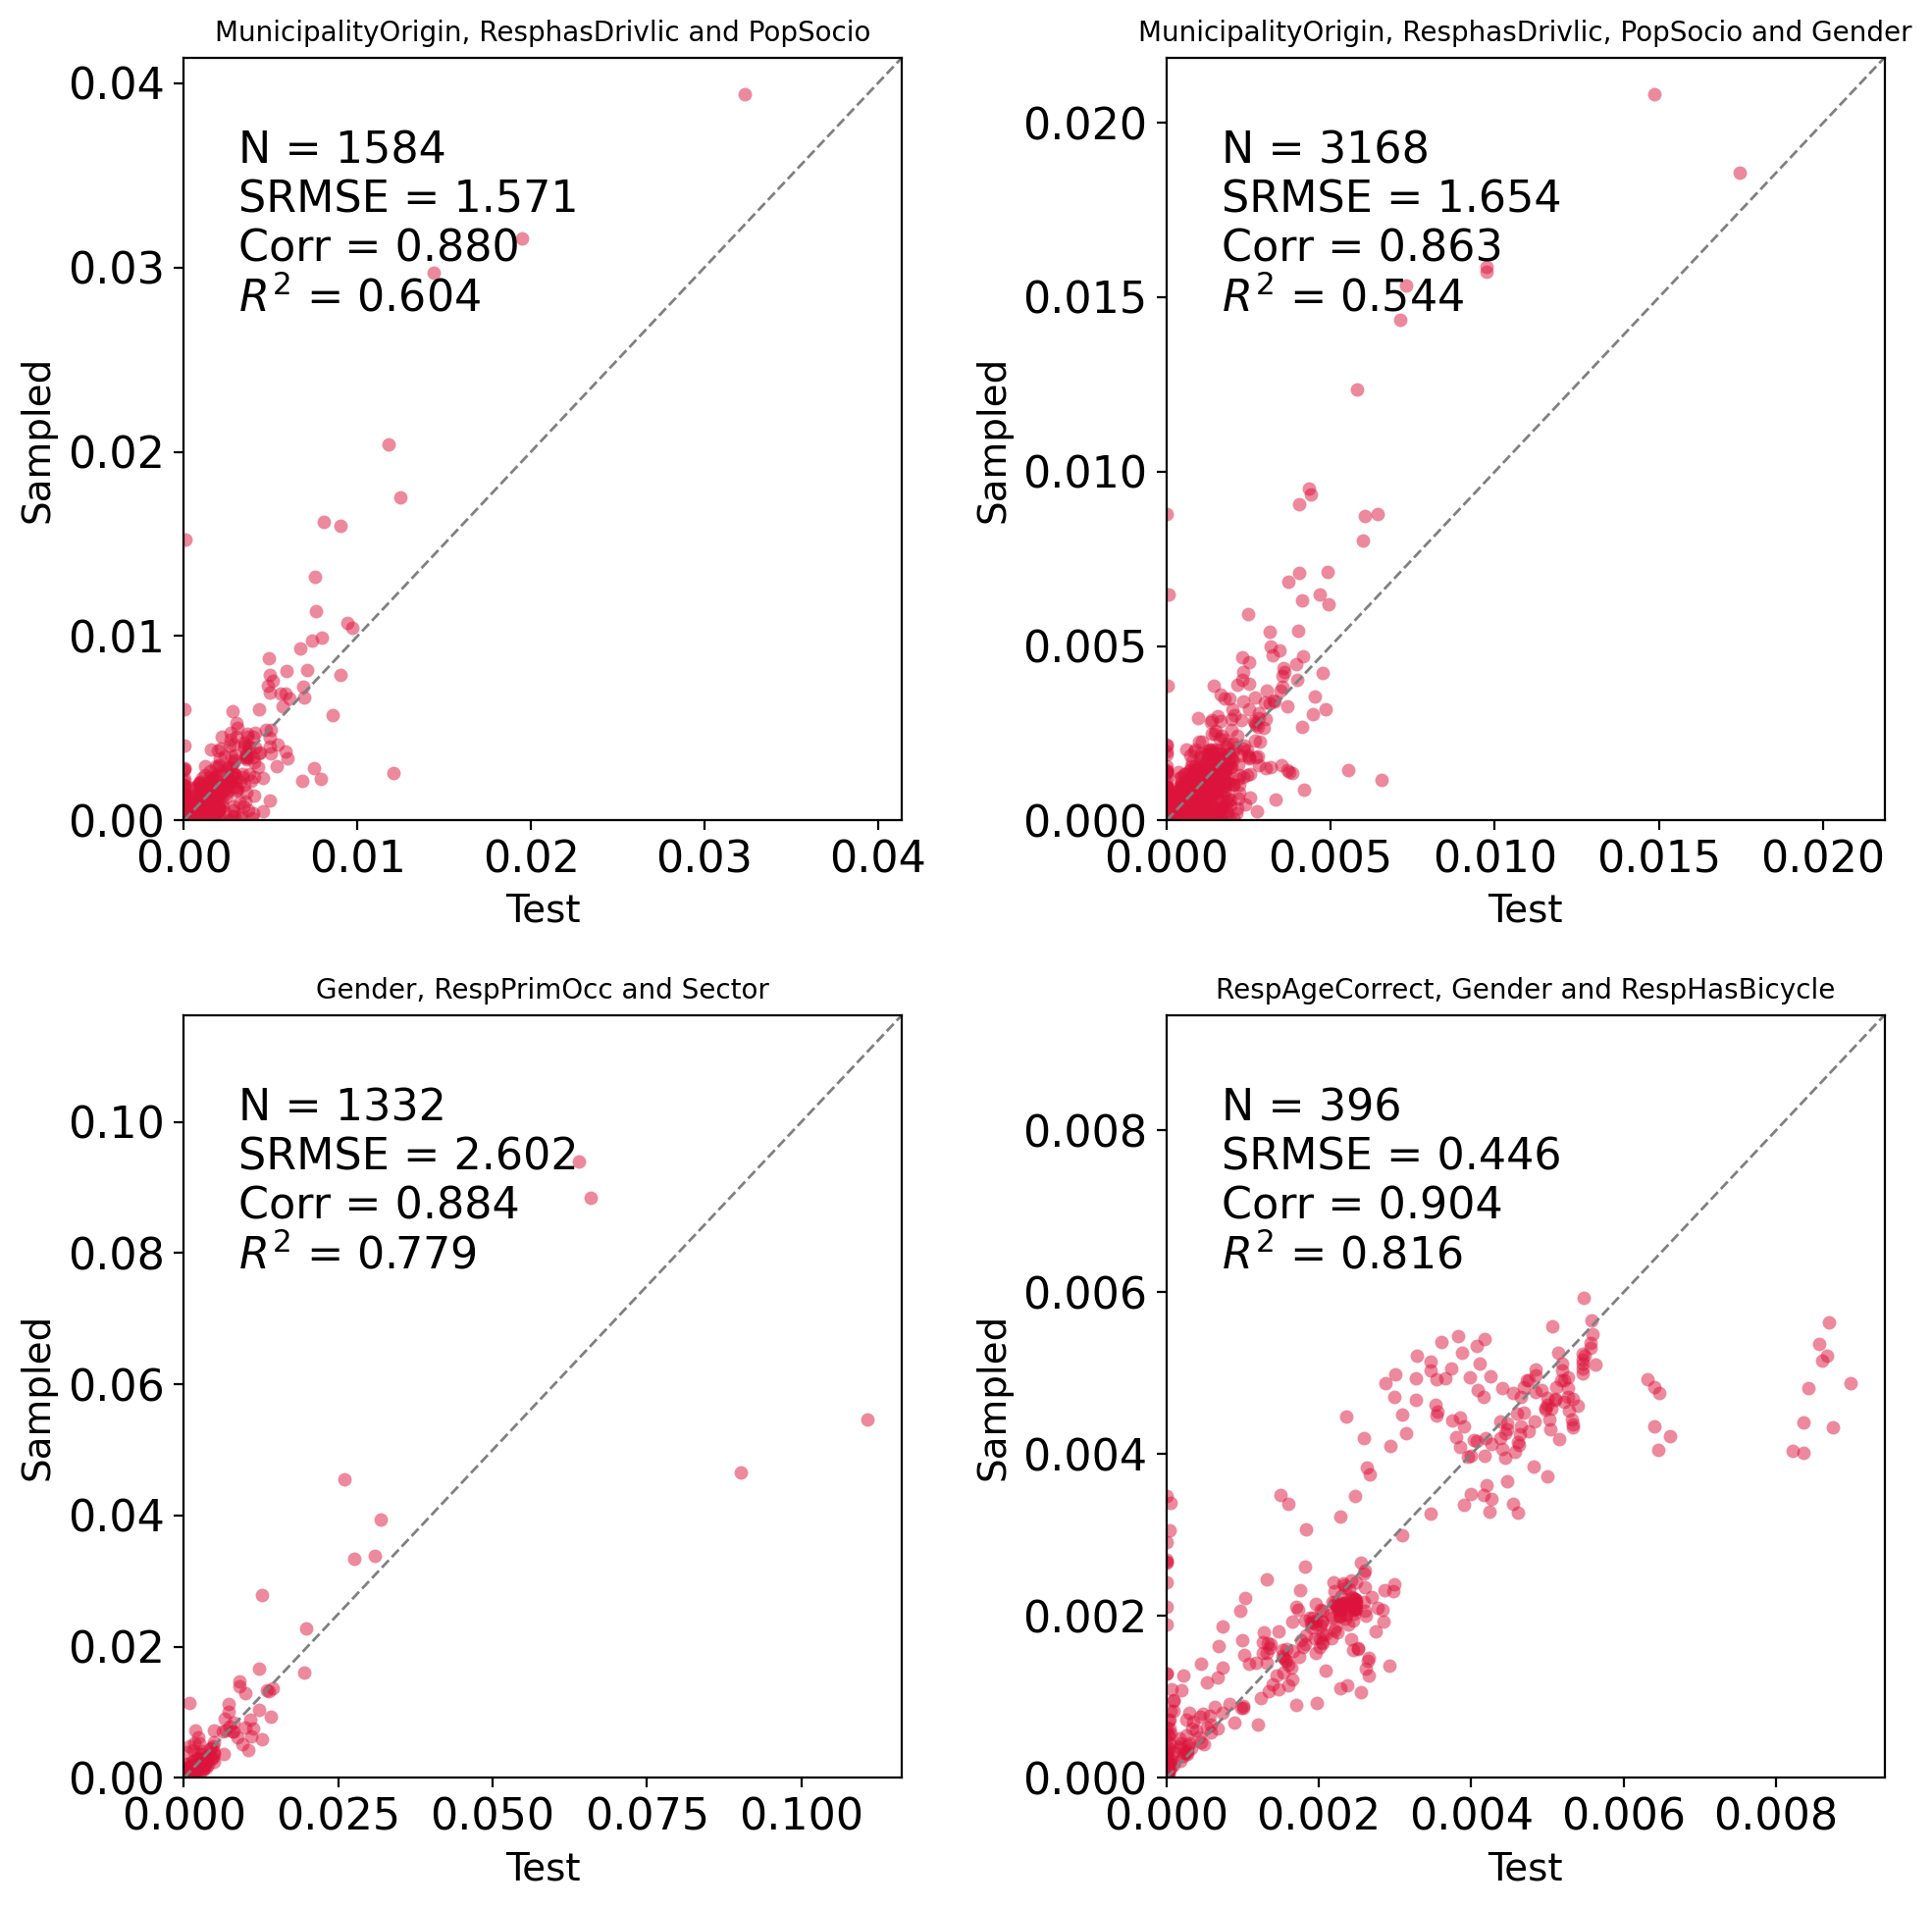

In [183]:
plotjoint(test, wgan_pop,'Results/wgan_pop_joint1_tu.png')

Aggregated variables: 
RespPrimOcc
ResphasDrivlic
Sector
Number of combinations: 2664
Aggregated variables: 
MunicipalityDest
ResphasDrivlic
Number of combinations: 400
Aggregated variables: 
RespPrimOcc
Sector
Number of combinations: 666
Aggregated variables: 
RespPrimOcc
Sector
Education
Number of combinations: 5328


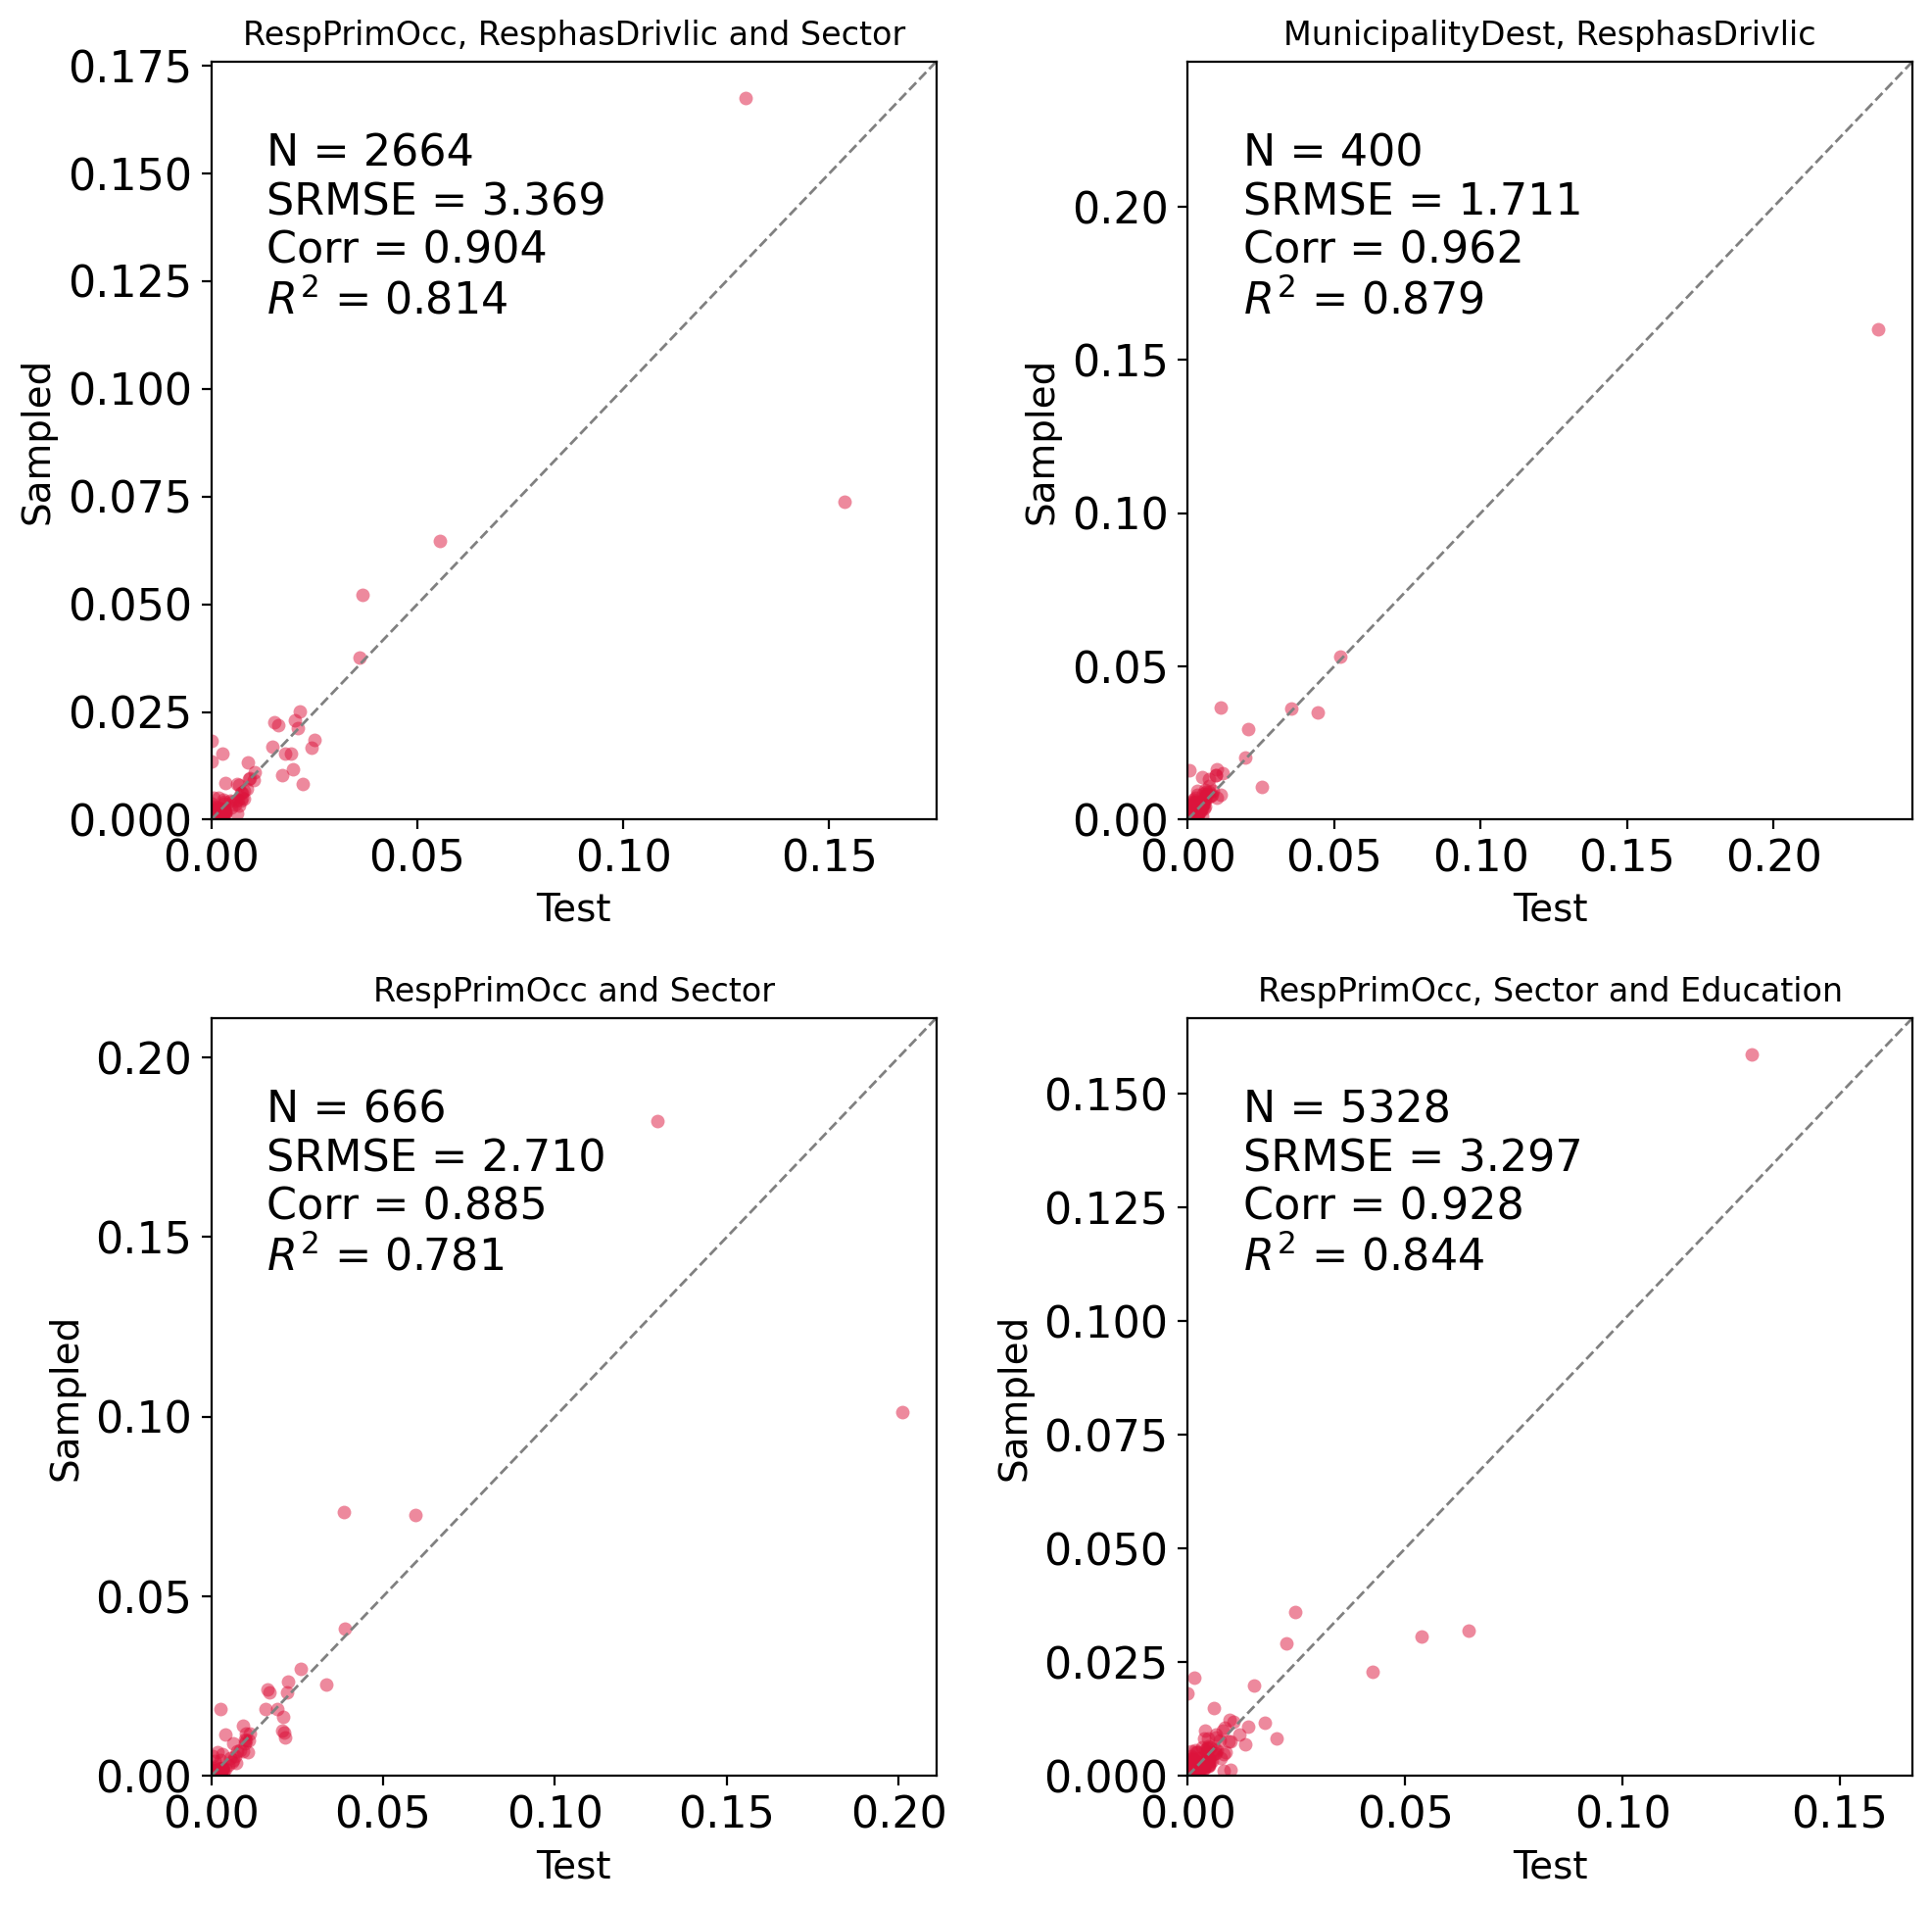

In [184]:
plotjoint2(test, wgan_pop, 'Results/wgan_pop_joint2_tu.png')

In [61]:
ds = pd.read_csv('HFUDD16-2.csv', sep=';')
ds.BOPOMR = ds.BOPOMR.astype(str).astype('category')
ds =ds.loc[ds.BOPOMR.isin(test.MunicipalityOrigin.unique())]
ds.KOEN = ds.KOEN.astype('category')
pop_rename = {
    'BOPOMR':'MunicipalityOrigin',
    'UDDANNELSEF':'Education',
    'ERHVERV':'Sector',
    'KOEN':'Gender',
    'ALDER':'AgeGroup',
    'SOCIO':'PopSocio',
    'INDHOLD':'Val',

}

ds.rename(index=str, columns=pop_rename, inplace=True)
ds.Gender = ds.Gender.astype('category').cat.rename_categories({'M':1, 'K':2})
ds.Val.sum()

4033670

In [63]:
ds.Sector = ds.Sector.astype('category').cat.rename_categories({ 'A': 'Agriculture, forestry and fishing',
'B' : 'Mining and quarrying',
'CA' :'Manufacture of food products, beverages and tobacco',
'CB': 'Textiles and leather products',
'CC' : 'Wood and paper products and printing',
'CD' : 'Oil refinery etc',
'CE' : 'Manufacture of chemicals',
'CF' : 'Pharmaceuticals',
'CG' :'Manufacture of plastic, glass and concrete',
'CH':'Basic metals and fabricated metal products',
'CI' :'Manufacture of electronic components',
'CJ': 'Electrical equipment',
'CK' :'Manufacture of machinery',
'CL' :'Transport equipment',
'CM':'Manufacture of funiture and other manufacturing',
'D' :'Electricity, gas, steam and air conditioning supply',
'E' :'Water supply, sewerage and waste management',
'F' : 'Construction',
'G' :'Wholesale and retail trade',
'H': 'Transportation',
'I' :'Accommodation and food service activities',
'JA': 'Publishing, television and radio broadcasting',
'JB' :'Telecommunications',
'JC' :'IT and information service activities',
'K' :'Financial and insurance',
'L' :'Real estate activities',
'MA': 'Consultancy etc.',
'MB' :'Scientific research and development',
'MC': 'Advertising and other business services',
'N' :'Travel agent, cleaning, and other operationel services',
'O' :'Public administration, defence and compulsory social security',
'P' :'Education',
'QA':'Human health activities',
'QB' :'Residential care',
'R' :'Arts, entertainment and recreation activities',
'S': 'Other service activities etc.',
'X' :'Activity not stated' })

In [71]:
df_wgan_pop

MunicipalityOrigin Gender Education AgeGroup PopSocio  \
0                      101      1       H10    15-19        0   
1                      101      1       H10    15-19        0   
2                      101      1       H10    15-19        0   
3                      101      1       H10    15-19        0   
4                      101      1       H10    15-19        0   
...                    ...    ...       ...      ...      ...   
2433019                621      2       H99    65-69        3   
2433020                621      2       H99    65-69        3   
2433021                621      2       H99    65-69        3   
2433022                621      2       H99    65-69        3   
2433023                621      2       H99    65-69        3   

                                            Sector       Val  
0        Accommodation and food service activities  0.000024  
1                              Activity not stated  0.000168  
2                Agriculture, forestry and fishing  0.000001  
3                                     Construction  0.000000  
4                                        Education  0.001985  
...                                            ...       ...  
2433019                         Telecommunications  0.000000  
2433020                        Transport equipment  0.000000  
2433021                   Manufacture of chemicals  0.000000  
2433022                            Pharmaceuticals  0.000000  
2433023                       Mining and quarrying  0.000000  

[2433024 rows x 7 columns]

In [138]:
wgan_pop.Education

0          H10
1          H10
2          H10
3          H10
4          H20
          ... 
5809960    H10
5809961    H30
5809962    H10
5809963    H30
5809964    H30
Name: Education, Length: 5809965, dtype: category
Categories (8, object): ['H10', 'H20', 'H30', 'H50', 'H60', 'H40', 'H35', 'H99']

In [144]:
ds = ds.loc[ds.Education.isin(wgan_pop.Education.unique())]
ds = ds.loc[ds.Sector.isin(wgan_pop.Sector.unique())]

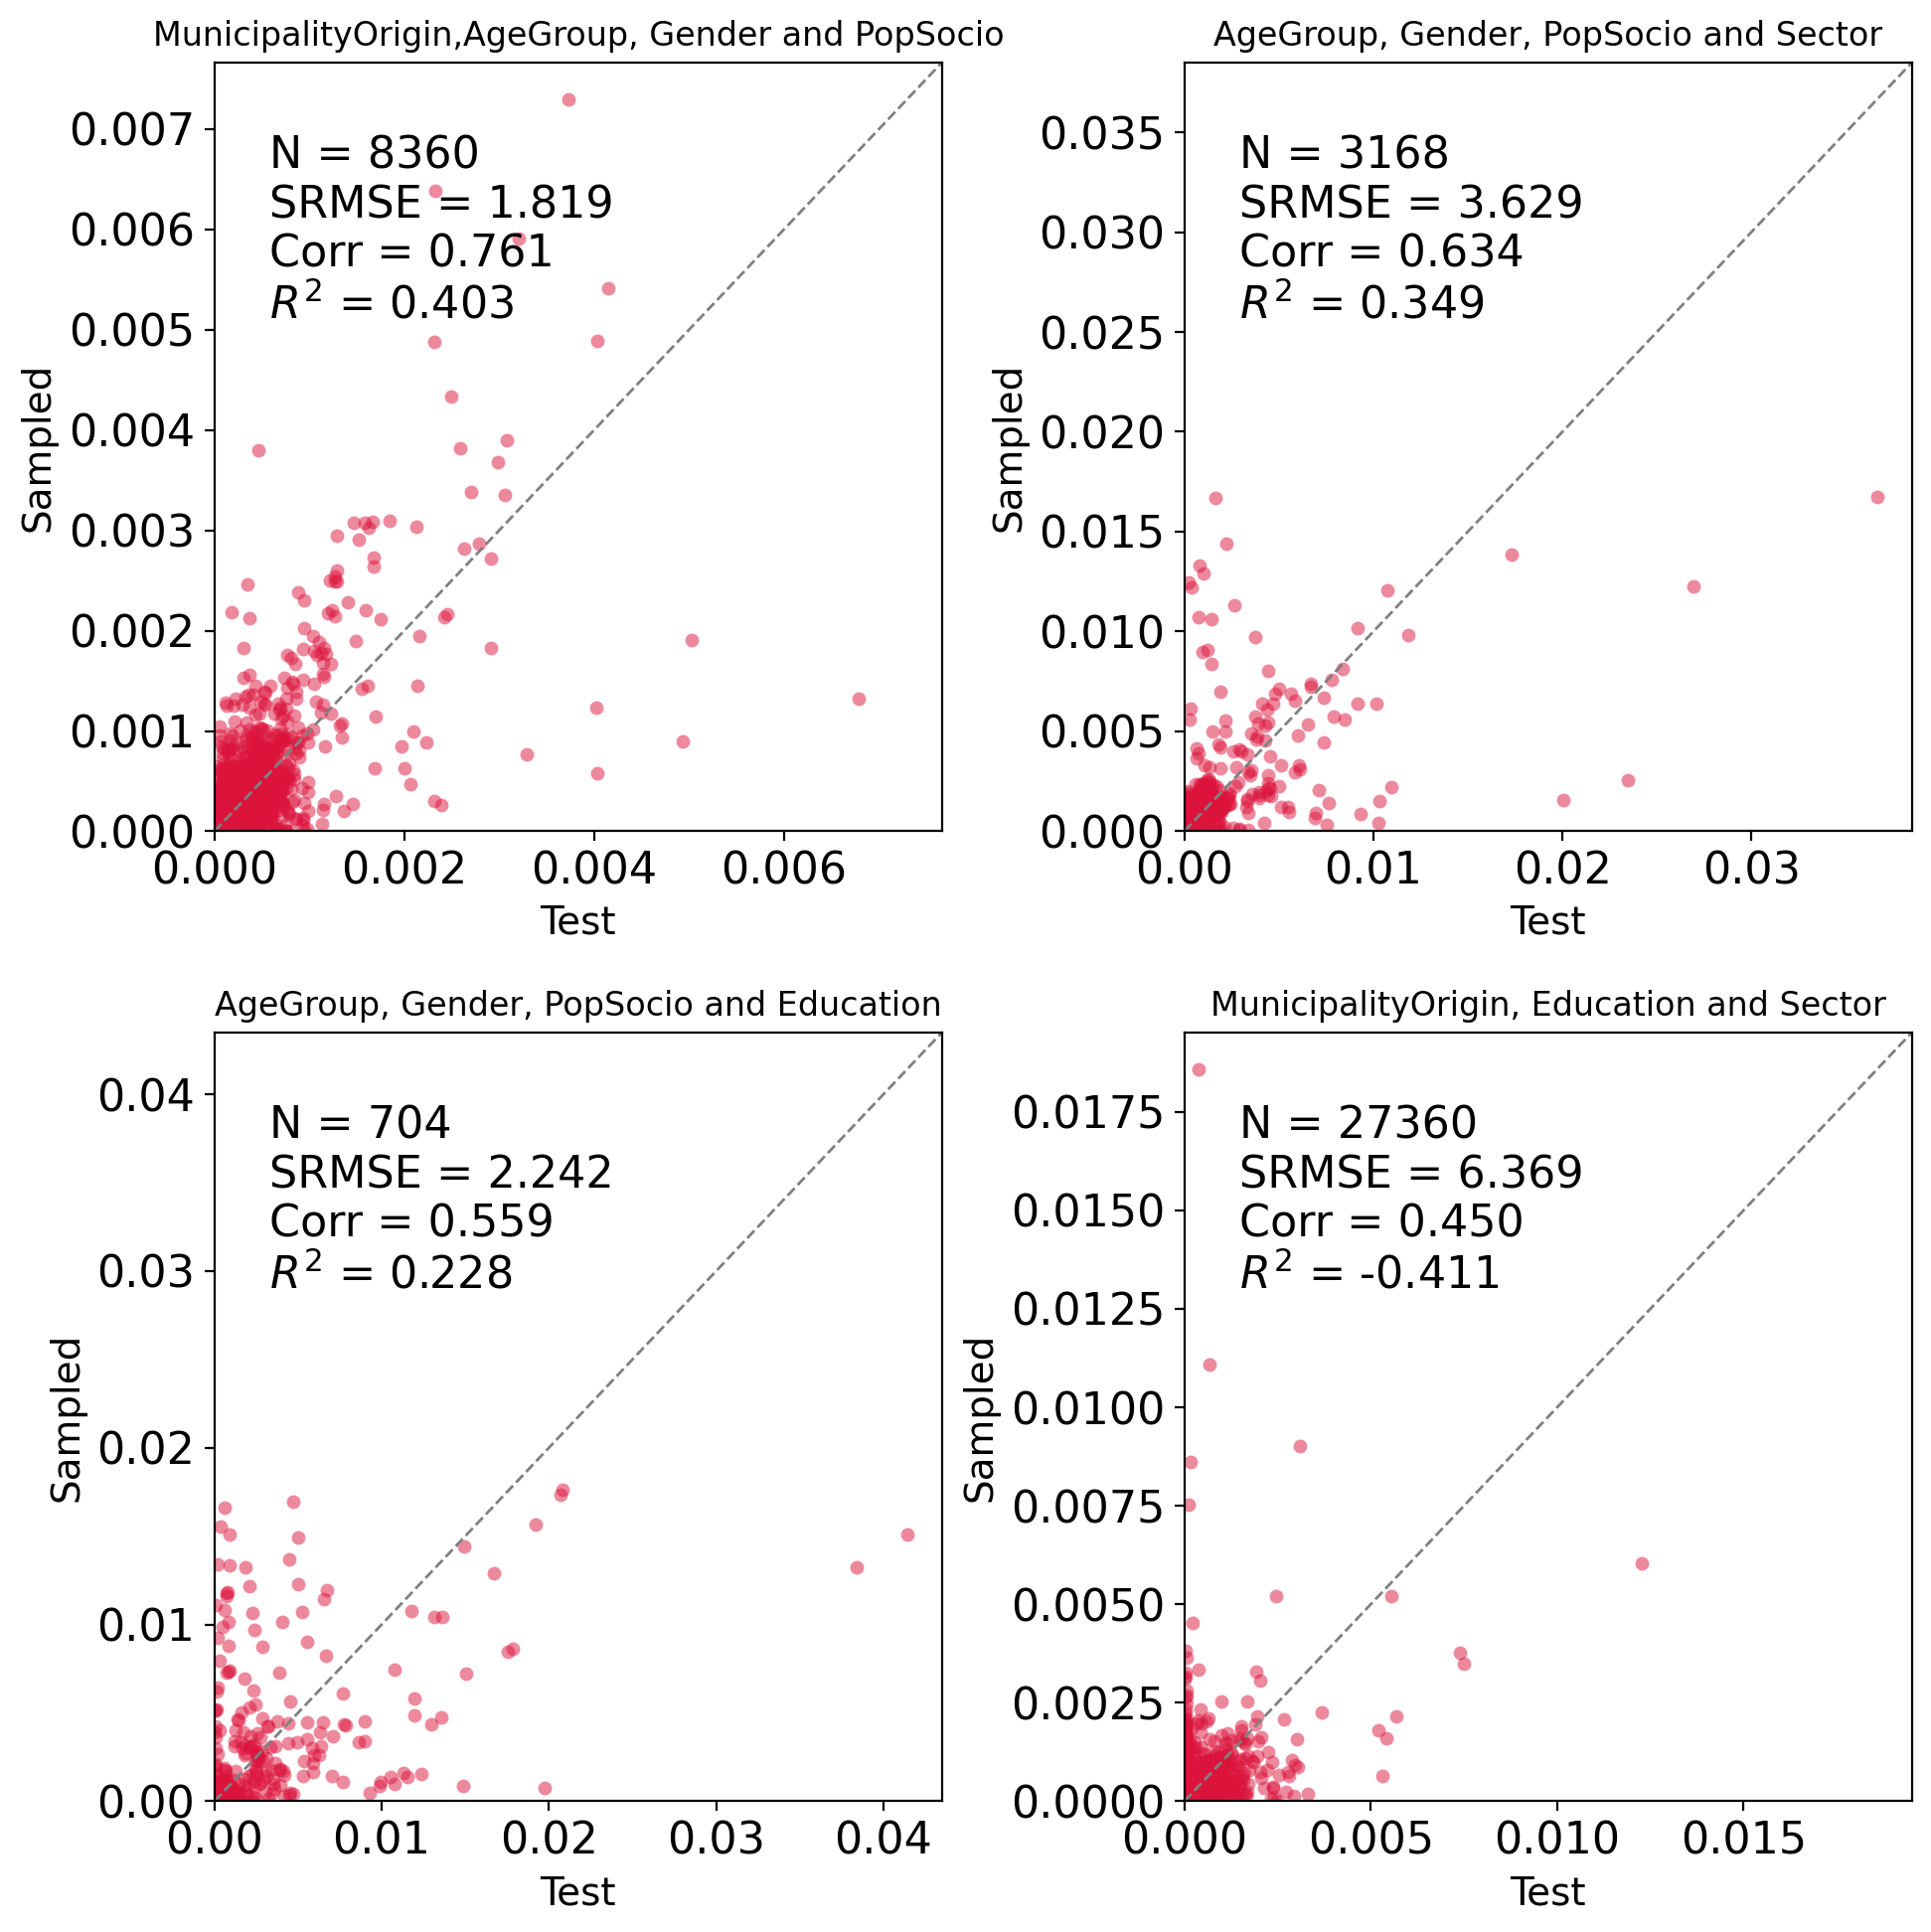

In [231]:
plotJointds(ds, wgan_pop, 'Results/df_wgan_pop_joint.png')

In [217]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'int64',
    'FamNumPers': 'int64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'int64',
    'HousehNumPers': 'int64',
    'HousehNumcars': 'int64',
    'HwDayspW': 'category',
    'IncFamily2000': 'int64',
    'IncRespondent2000': 'int64',
    'KidsBetween0and4': 'int64',
    'KidsBetween4and15': 'int64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'int64',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'int64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}
cidatgan = pd.read_csv('ciDatGan_synthetic_9_PopMarg.csv', dtype=df_dtypes)

In [319]:
test = pd.read_csv('simulationData_withNewCat.csv', sep=',', dtype=df_dtypes)
test.drop(['SessionId'],axis=1,inplace=True)
#test.drop(['count'], axis=1,inplace=True)
numerical = ['IncRespondent2000', 'IncFamily2000']
#test = test.loc[test['HomeAdrZone'].isin(zoneMargin.OTM70_ZoneID.astype('str').astype('category'))]
cidatgan.drop(['count'], axis=1, inplace=True)
test = test[cidatgan.columns]
len(test)

139619

In [226]:
len(cidatgan.drop_duplicates())

5818840

In [320]:
stats = validation(test, cidatgan)

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000
WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap
PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


In [321]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.002675 & 0.005935 & 0.998434 & 0.083094 & 0.999300 \\
FamNumAdults & 0.001038 & 0.001761 & 0.999904 & 0.019372 & 0.999957 \\
FamNumPers & 0.001404 & 0.002312 & 0.999534 & 0.032372 & 0.999768 \\
HousehNumAdults & 0.000578 & 0.000841 & 0.999977 & 0.010097 & 0.999992 \\
HousehNumPers & 0.001041 & 0.001958 & 0.999625 & 0.033292 & 0.999821 \\
WorkHoursPw & 0.003743 & 0.022800 & 0.863041 & 2.074798 & 0.929444 \\
HousehNumcars & 0.001765 & 0.003897 & 0.999206 & 0.062357 & 0.999660 \\
Year & 0.000867 & 0.001130 & 0.998459 & 0.014693 & 0.999638 \\
Gender & 0.008771 & 0.008771 & 0.324005 & 0.017543 & 1.000000 \\
Education & 0.029273 & 0.044756 & 0.848811 & 0.358050 & 0.924789 \\
Handicap & 0.000286 & 0.000286 & 1.000000 & 0.000572 & 1.000000 \\
PopSocio & 0.082264 & 0.099248 & 0.578792 & 0.396994 & 0.922199 \\
RespPrimOcc & 0.018140 & 0.041960 & 0.822774 & 0.755285 & 0.9679

In [220]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.017644
rmse     0.024582
r2       0.914769
srmse    0.289989
corr     0.984322
dtype: float64

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
Aggregated variables: 
Gender
RespPrimOcc
Sector
Number of combinations: 1332
Aggregated variables: 
RespAgeCorrect
Gender
RespHasBicycle
Number of combinations: 396


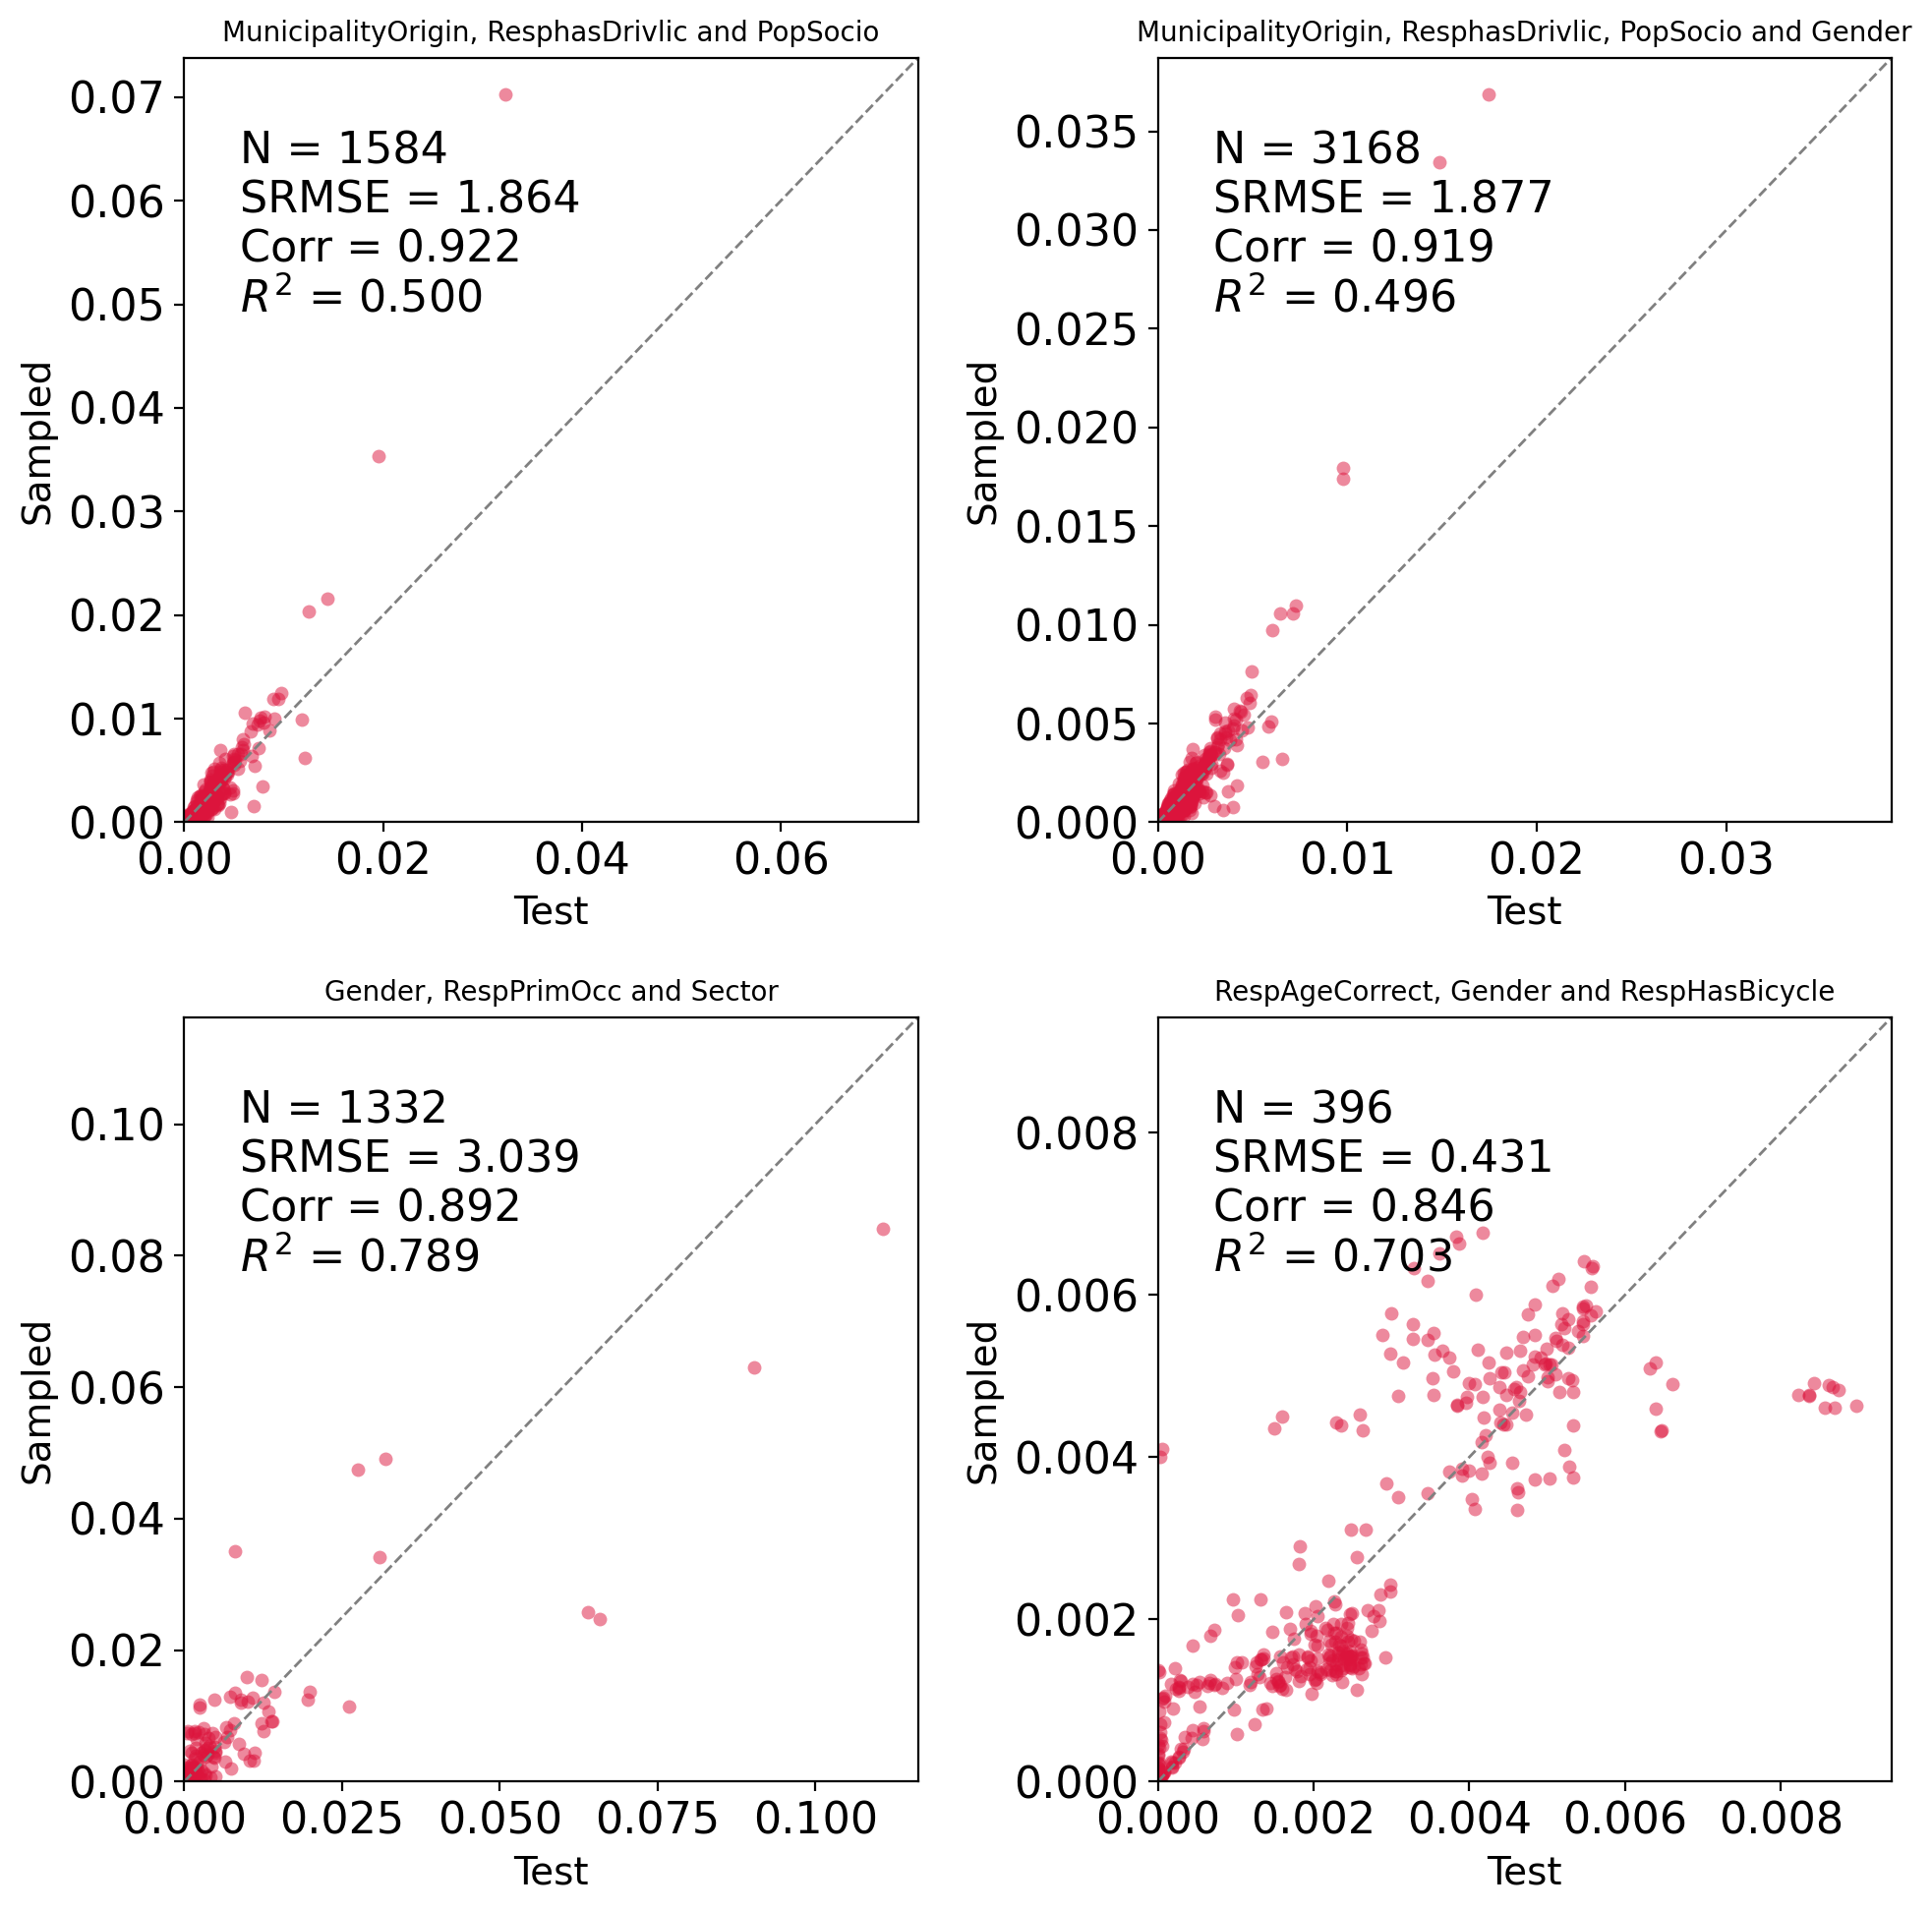

In [221]:
plotjoint(test, cidatgan, 'Results/cidatgan_pop_joint1_tu.png')

Aggregated variables: 
RespPrimOcc
ResphasDrivlic
Sector
Number of combinations: 2664
Aggregated variables: 
MunicipalityDest
ResphasDrivlic
Number of combinations: 400
Aggregated variables: 
RespPrimOcc
Sector
Number of combinations: 666
Aggregated variables: 
RespPrimOcc
Sector
Education
Number of combinations: 5328


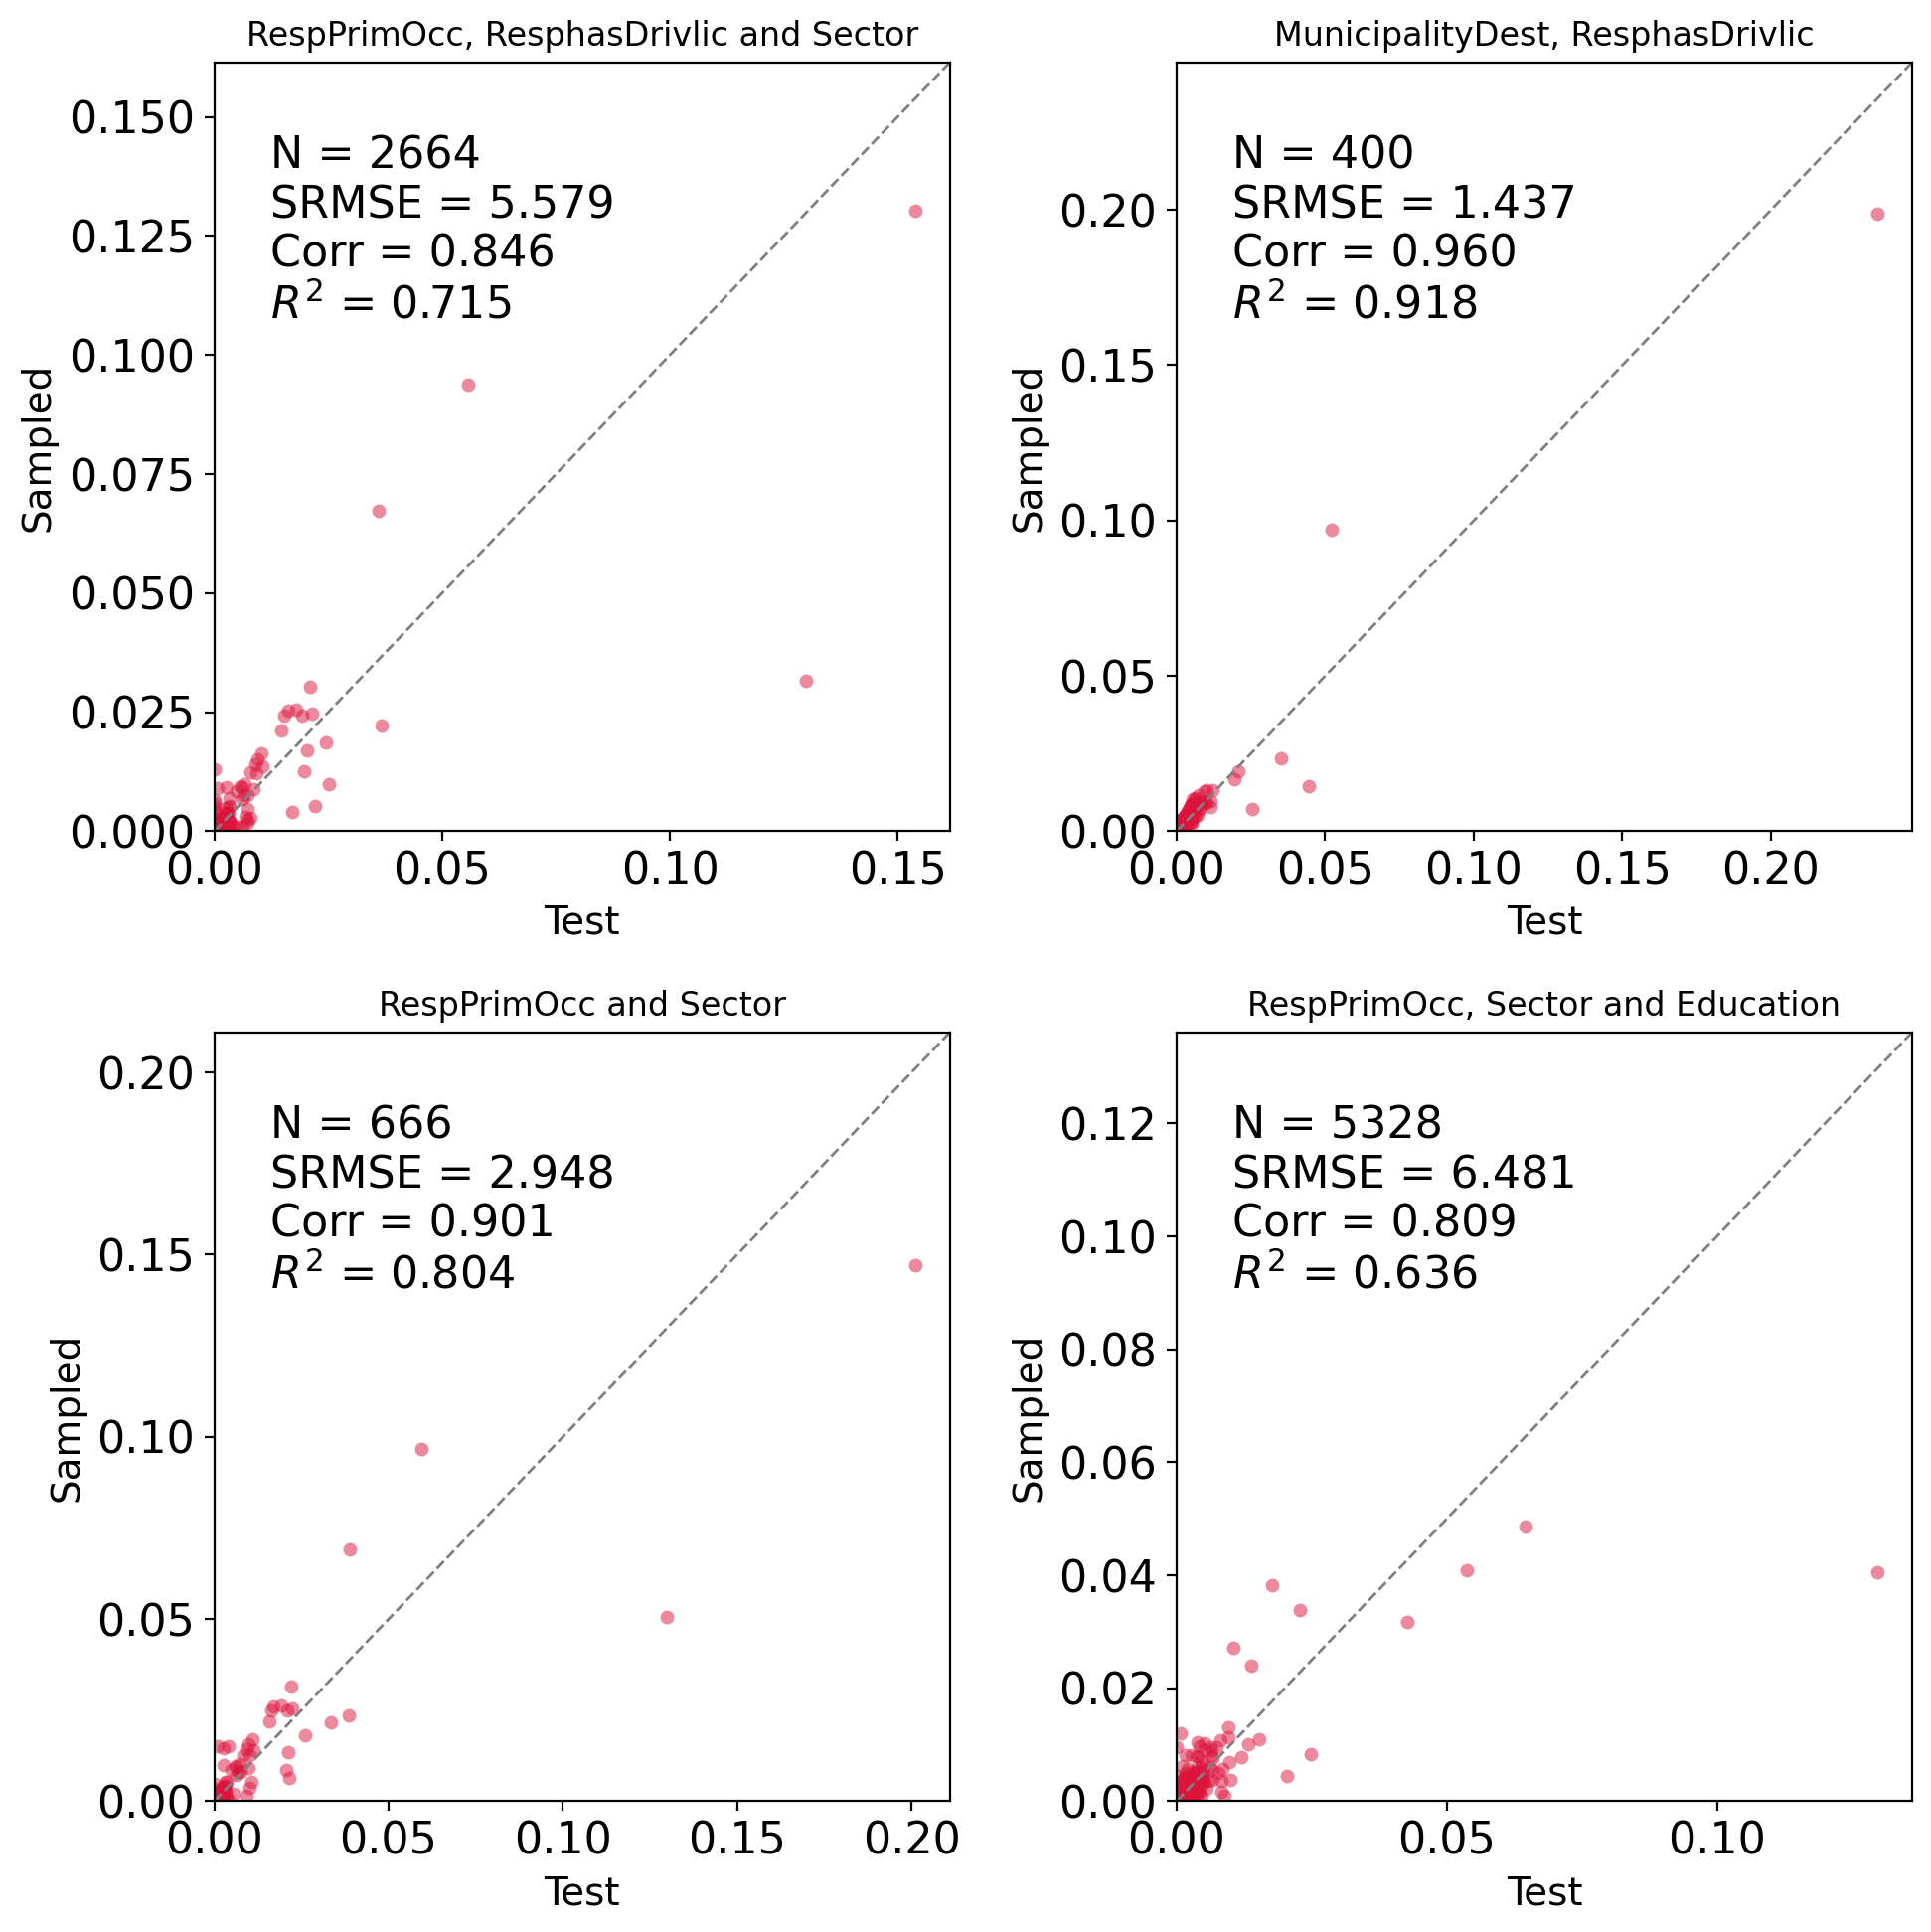

In [222]:
plotjoint2(test, cidatgan, 'Results/cidatgan_pop_joint2_tu.png')

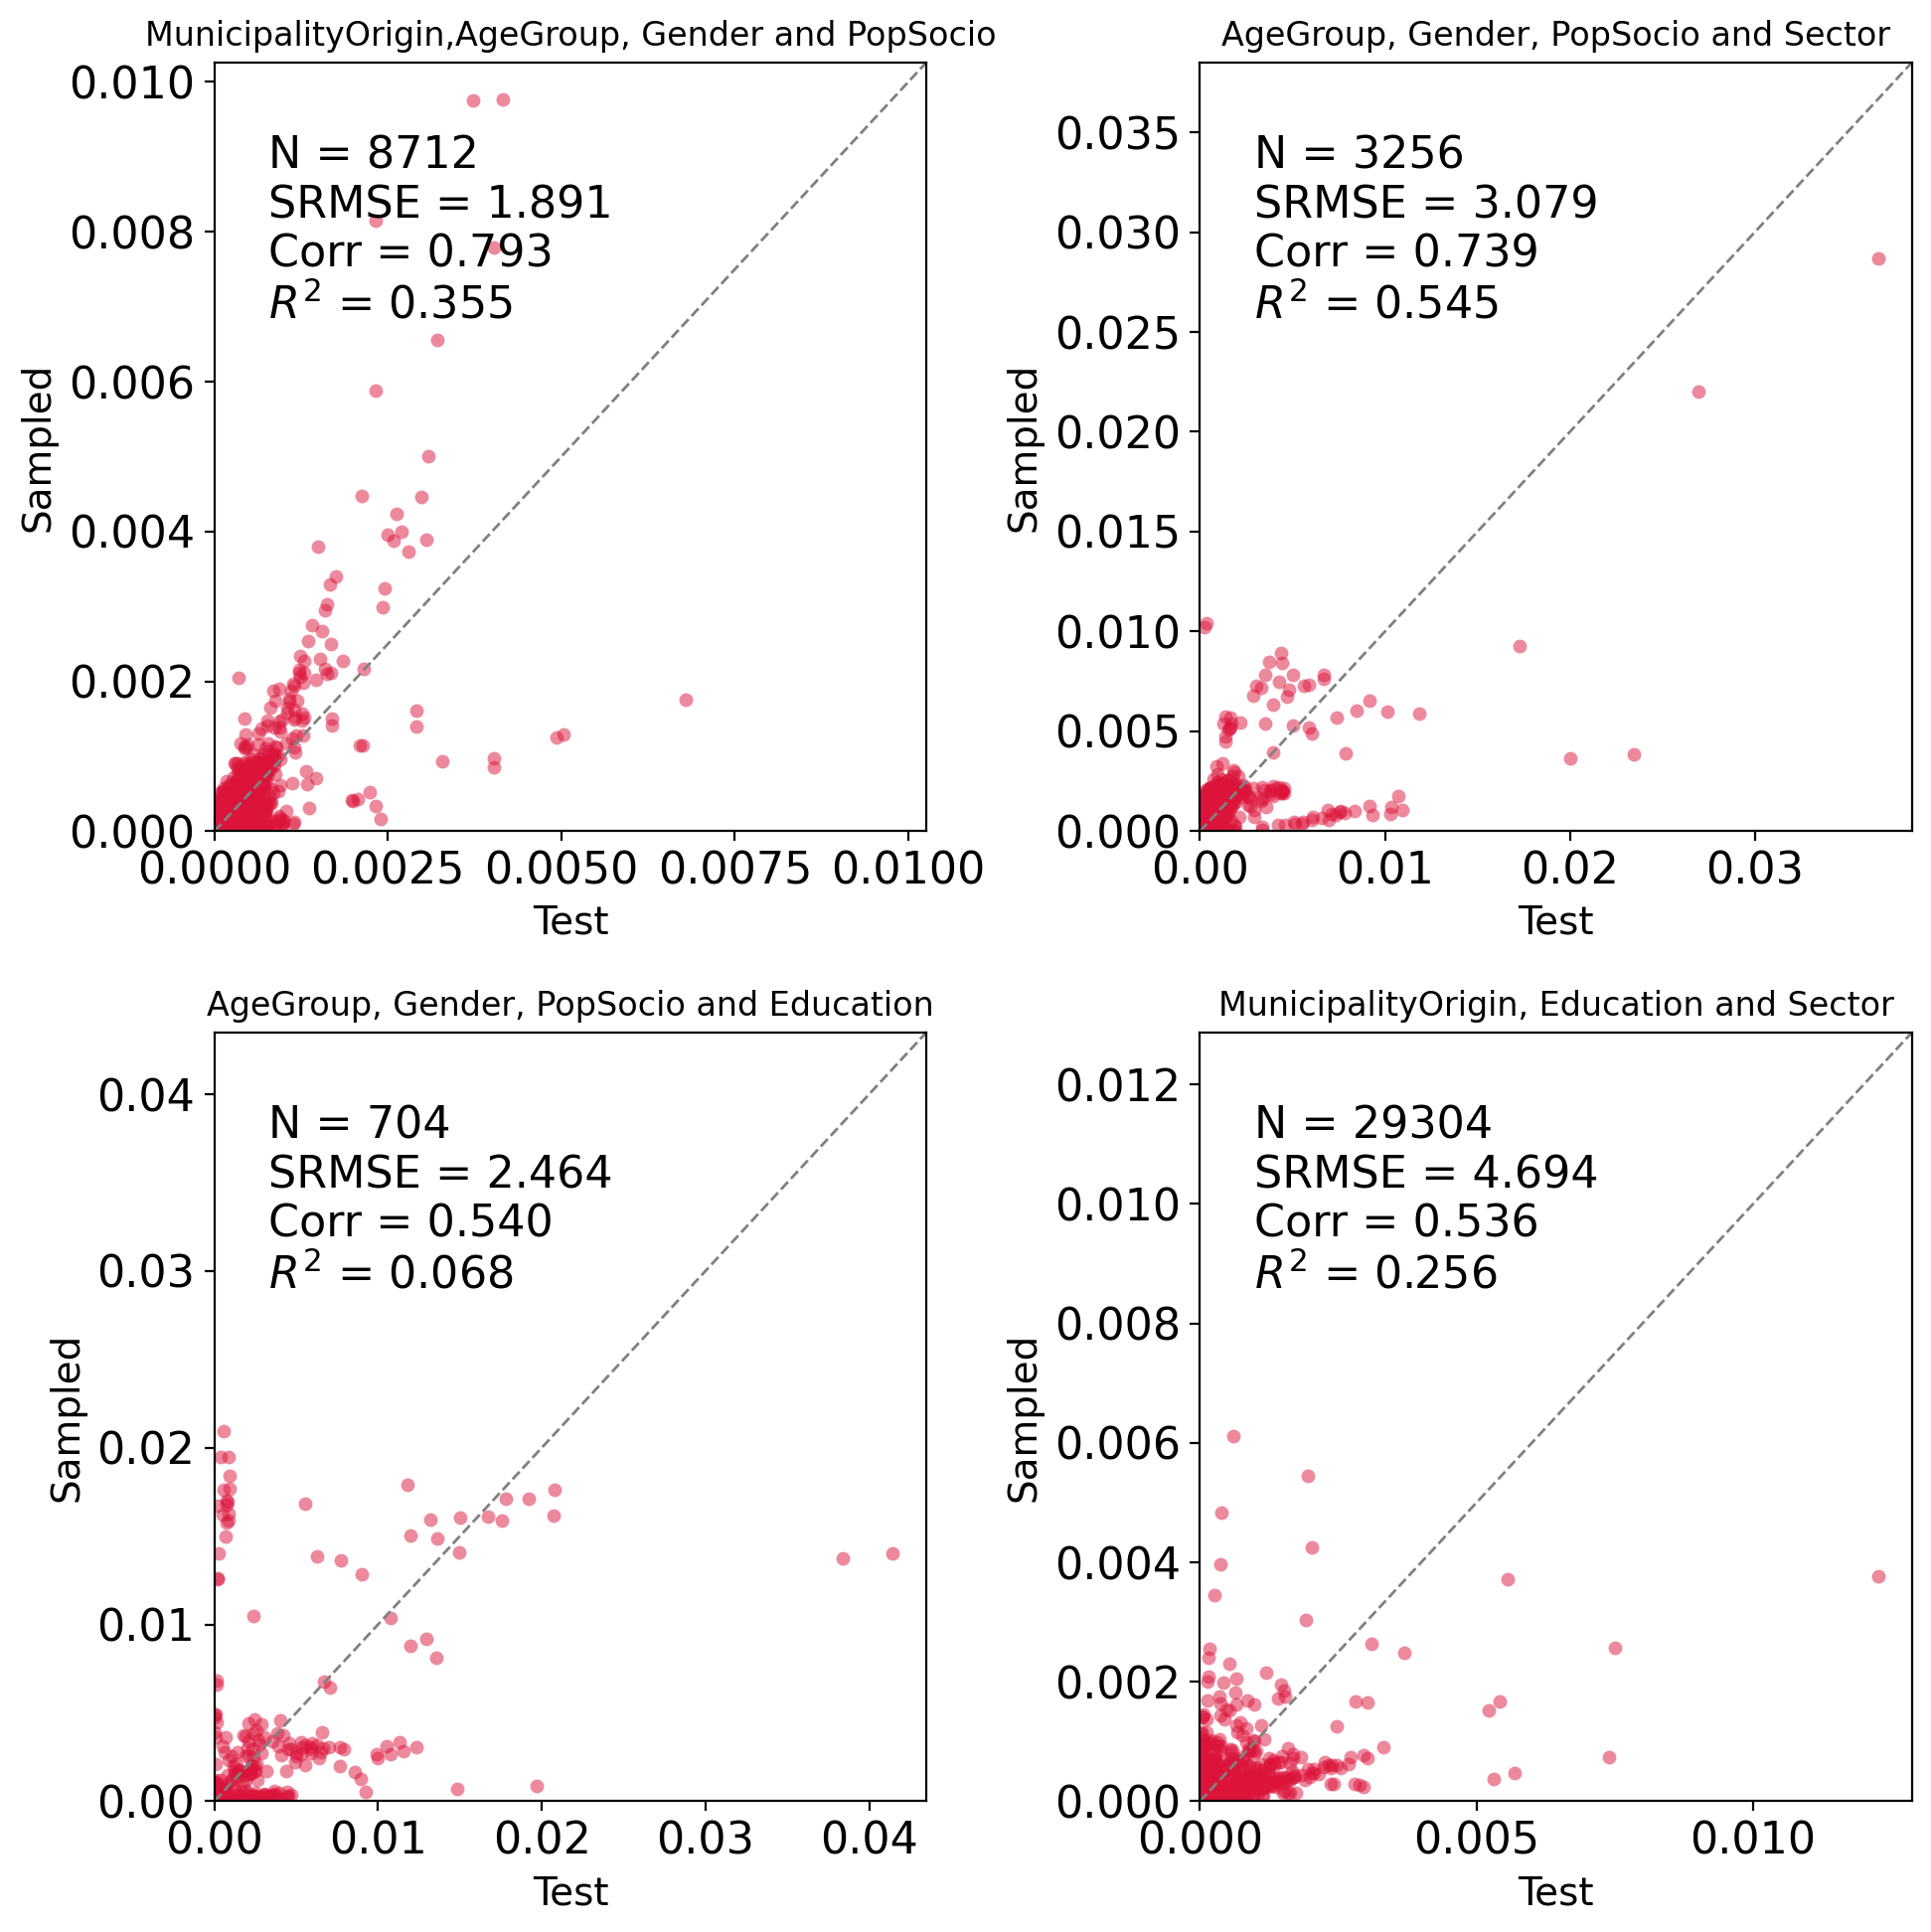

In [230]:
plotJointds(ds, cidatgan, 'Results/cidatgan_pop_joint_ds.png' )

In [150]:
real_and_sampled

Val_real  Val_sampled     diff
0       0.000000     0.000000  0.00000
1       0.000000     0.000000  0.00000
2       0.000000     0.000000  0.00000
3       0.000000     0.000000  0.00000
4       0.000000     0.000000  0.00000
...          ...          ...      ...
341875  0.000000     0.000000  0.00000
341876  0.000000     0.000000  0.00000
341877  0.000000     0.000000  0.00000
341878  0.000000     0.000000  0.00000
341879  0.000357     0.000167  0.00019

[341880 rows x 3 columns]

In [233]:
ds.MunicipalityOrigin.nunique()

99

In [234]:
ds.Education.nunique()

7

In [235]:
ds.Sector.nunique()

36

In [237]:
ds.AgeGroup.nunique()

11

In [239]:
ds

MunicipalityOrigin Education                             Sector   TID  \
53998                 101       H10  Agriculture, forestry and fishing  2020   
53999                 101       H10  Agriculture, forestry and fishing  2020   
54000                 101       H10  Agriculture, forestry and fishing  2020   
54001                 101       H10  Agriculture, forestry and fishing  2020   
54002                 101       H10  Agriculture, forestry and fishing  2020   
...                   ...       ...                                ...   ...   
413146                860       H60                Activity not stated  2020   
413147                860       H60                Activity not stated  2020   
413148                860       H60                Activity not stated  2020   
413149                860       H60                Activity not stated  2020   
413150                860       H60                Activity not stated  2020   

       Gender AgeGroup  PopSocio  Val  
53998       2    15-19         0    8  
53999       1    15-19         0    2  
54000       1    20-24         0    2  
54001       1    25-29         0    1  
54002       1    30-34         0    1  
...       ...      ...       ...  ...  
413146      1    50-54         3    4  
413147      1    55-59         3    3  
413148      1    60-64         3    2  
413149      2    65-69         3    5  
413150      1    65-69         3    4  

[295004 rows x 8 columns]

In [35]:
age = pd.read_csv('RespAgeCorrectp.csv')
gender = pd.read_csv('Genderp.csv')
popSocio = pd.read_csv('popsociop.csv')
mun = pd.read_csv('MunicipalityOriginp.csv')

In [251]:
mun

MunicipalityOrigin       Val
0                  101  0.108598
1                  147  0.017913
2                  155  0.002489
3                  185  0.007383
4                  165  0.004763
..                 ...       ...
94                 773  0.003477
95                 840  0.005172
96                 787  0.007457
97                 820  0.006307
98                 851  0.037280

[99 rows x 2 columns]

In [240]:
age

RespAgeCorrect     total
0                 0  0.010556
1                 1  0.010633
2                 2  0.010673
3                 3  0.010768
4                 4  0.010246
..              ...       ...
121             121  0.000000
122             122  0.000000
123             123  0.000000
124             124  0.000000
125             125  0.000000

[126 rows x 2 columns]

In [241]:
gender

Gender     total
0       1  0.497516
1       2  0.502484

In [303]:
len(datgan.drop_duplicates())

5822429

In [301]:
len(cidatgan)

5818840

In [289]:

df_wgan_pop = wgan_pop.copy()

#df_wgan_pop = df_wgan_pop['RespAgeCorrect']

comb = df_wgan_pop.copy()

df_wgan_pop = df_wgan_pop.groupby('RespAgeCorrect').size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
age = age.rename(columns={'total':'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    #ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
real_and_sampled = pd.merge(age, df_wgan_pop, suffixes=['_real', '_sampled'], on=['RespAgeCorrect'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

Y_test = real_and_sampled['Val_real']
Y_pred = real_and_sampled['Val_sampled']

min_Y = min([min(Y_test),min(Y_pred)])
max_Y = max([max(Y_test),max(Y_pred)])
w = max_Y - min_Y
max_Y += w * 0.05
stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)


In [290]:
stat

{'mae': 0.000665647765785967,
 'rmse': 0.0013093029731388295,
 'r2': 0.9430527017641331,
 'srmse': 0.16497217461549324,
 'corr': 0.9723335975128959}

In [262]:
mun['MunicipalityOrigin'] = mun['MunicipalityOrigin'].astype('category')

In [263]:
mun['MunicipalityOrigin'] 

0     101
1     147
2     155
3     185
4     165
     ... 
94    773
95    840
96    787
97    820
98    851
Name: MunicipalityOrigin, Length: 99, dtype: category
Categories (99, int64): [101, 147, 151, 153, ..., 846, 849, 851, 860]

In [264]:
cidatgan['MunicipalityOrigin']

0          101
1          101
2          101
3          101
4          101
          ... 
5818835    851
5818836    860
5818837    851
5818838    851
5818839    851
Name: MunicipalityOrigin, Length: 5818840, dtype: category
Categories (99, object): ['101', '147', '151', '153', ..., '846', '849', '851', '860']

In [297]:
df_wgan_pop = datgan.copy()

#df_wgan_pop = df_wgan_pop['RespAgeCorrect']

comb = df_wgan_pop.copy()

df_wgan_pop = df_wgan_pop.groupby('Gender').size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
gender = gender.rename(columns={'total':'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
gender['Gender'] = gender['Gender'].astype(str).astype('category')

    ##### Merge and difference
real_and_sampled = pd.merge(gender, df_wgan_pop, suffixes=['_real', '_sampled'], on=['Gender'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

Y_test = real_and_sampled['Val_real']
Y_pred = real_and_sampled['Val_sampled']

min_Y = min([min(Y_test),min(Y_pred)])
max_Y = max([max(Y_test),max(Y_pred)])
w = max_Y - min_Y
max_Y += w * 0.05
stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

In [298]:
stat

{'mae': 2.0100854056237516e-07,
 'rmse': 2.0100854056237516e-07,
 'r2': 0.9999999934515209,
 'srmse': 4.020170811247503e-07,
 'corr': 1.0}

In [293]:
df_wgan_pop = wgan_pop.copy()

#df_wgan_pop = df_wgan_pop['RespAgeCorrect']

comb = df_wgan_pop.copy()

df_wgan_pop = df_wgan_pop.groupby('MunicipalityOrigin').size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
mun = mun.rename(columns={'total':'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
mun['MunicipalityOrigin'] = mun['MunicipalityOrigin'].astype(str).astype('category')

    ##### Merge and difference
real_and_sampled = pd.merge(mun, df_wgan_pop, suffixes=['_real', '_sampled'], on=['MunicipalityOrigin'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

Y_test = real_and_sampled['Val_real']
Y_pred = real_and_sampled['Val_sampled']

min_Y = min([min(Y_test),min(Y_pred)])
max_Y = max([max(Y_test),max(Y_pred)])
w = max_Y - min_Y
max_Y += w * 0.05
stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

In [294]:
stat

{'mae': 6.474770716552912e-05,
 'rmse': 0.00015485125073261036,
 'r2': 0.9998489624872566,
 'srmse': 0.0153302738225285,
 'corr': 0.9999390295333995}

In [295]:
df_wgan_pop = wgan_pop.copy()

#df_wgan_pop = df_wgan_pop['RespAgeCorrect']

comb = df_wgan_pop.copy()

df_wgan_pop = df_wgan_pop.groupby('PopSocio').size().reset_index()
df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
popSocio = popSocio.rename(columns={'total':'Val'})
df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
popSocio['PopSocio'] = popSocio['PopSocio'].astype(str).astype('category')

    ##### Merge and difference
real_and_sampled = pd.merge(popSocio, df_wgan_pop, suffixes=['_real', '_sampled'], on=['PopSocio'], how='outer', indicator=True)
real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

Y_test = real_and_sampled['Val_real']
Y_pred = real_and_sampled['Val_sampled']

min_Y = min([min(Y_test),min(Y_pred)])
max_Y = max([max(Y_test),max(Y_pred)])
w = max_Y - min_Y
max_Y += w * 0.05
stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

In [296]:
stat

{'mae': 0.0005820168779717668,
 'rmse': 0.0006216443273649539,
 'r2': 0.9999920093422133,
 'srmse': 0.002486577309459816,
 'corr': 0.9999988277370128}

In [209]:
df_dtypes = {
    'CarModelYear': 'category',
    'Education': 'category',
    'FamNumAdults': 'int64',
    'FamNumPers': 'int64',
    'FuelType': 'category',
    'Gender': 'category',
    'Handicap': 'category',
    'HomeAdrZone': 'category',
    'HousehCarOwnership': 'category',
    'HousehNumAdults': 'int64',
    'HousehNumPers': 'int64',
    'HousehNumcars': 'int64',
    'HwDayspW': 'category',
    'IncFamily2000': 'int64',
    'IncRespondent2000': 'int64',
    'KidsBetween0and4': 'int64',
    'KidsBetween4and15': 'int64',
    'MunicipalityDest': 'category',
    'MunicipalityOrigin': 'category',
    'PopSocio': 'category',
    'PrimOccZone': 'category',
    'RespAgeCorrect': 'int64',
    'RespHasBicycle': 'category',
    'RespHasRejsekort': 'category',
    'RespIsmemCarshare': 'category',
    'RespPrimOcc': 'category',
    'ResphasDrivlic': 'category',
    'Sector': 'category',
    'WorkHourType': 'category',
    'WorkHoursPw': 'int64',
    'Year': 'category',
    'HomeParkPoss': 'category',
    'HousehAccomodation': 'category',
    'HousehAccOwnorRent': 'category',
    'PosInFamily': 'category',
    'PrimModeDay': 'category',
    'ModeChainTypeDay': 'category',
    'RespHasSeasonticket': 'category'
}
datgan = pd.read_csv('datgan_pop_marginal.csv', dtype=df_dtypes)

In [227]:
len(datgan.drop_duplicates())

5822429

In [210]:
datgan.columns

Index(['Unnamed: 0', 'HousehCarOwnership', 'IncFamily2000', 'FamNumAdults',
       'FamNumPers', 'HousehNumAdults', 'HousehNumPers', 'IncRespondent2000',
       'WorkHoursPw', 'HousehNumcars', 'Year', 'Gender', 'RespAgeCorrect',
       'Education', 'Handicap', 'PopSocio', 'RespPrimOcc', 'KidsBetween0and15',
       'KidsBetween0and4', 'CarModelYear', 'MunicipalityOrigin',
       'MunicipalityDest', 'HomeAdrZone', 'PrimOccZone', 'WorkHourType',
       'RespHasBicycle', 'ResphasDrivlic', 'RespHasRejsekort',
       'RespIsmemCarshare', 'Sector', 'HwDayspW', 'FuelType', 'HomeParkPoss',
       'RespHasSeasonticket', 'HousehAccomodation', 'HousehAccOwnorRent',
       'PosInFamily', 'PrimModeDay', 'ModeChainTypeDay'],
      dtype='object')

In [322]:
test = pd.read_csv('simulationData_withNewCat.csv', sep=',', dtype=df_dtypes)
test.drop(['SessionId'],axis=1,inplace=True)
#test.drop(['count'], axis=1,inplace=True)
numerical = ['IncRespondent2000', 'IncFamily2000']
#test = test.loc[test['HomeAdrZone'].isin(zoneMargin.OTM70_ZoneID.astype('str').astype('category'))]
test = test[['HousehCarOwnership', 'IncFamily2000', 'FamNumAdults',
       'FamNumPers', 'HousehNumAdults', 'HousehNumPers', 'IncRespondent2000',
       'WorkHoursPw', 'HousehNumcars', 'Year', 'Gender', 'RespAgeCorrect',
       'Education', 'Handicap', 'PopSocio', 'RespPrimOcc', 'KidsBetween0and15',
       'KidsBetween0and4', 'CarModelYear', 'MunicipalityOrigin',
       'MunicipalityDest', 'HomeAdrZone', 'PrimOccZone', 'WorkHourType',
       'RespHasBicycle', 'ResphasDrivlic', 'RespHasRejsekort',
       'RespIsmemCarshare', 'Sector', 'HwDayspW', 'FuelType', 'HomeParkPoss',
       'RespHasSeasonticket', 'HousehAccomodation', 'HousehAccOwnorRent',
       'PosInFamily', 'PrimModeDay', 'ModeChainTypeDay']]
len(test)

139619

In [323]:
stats = validation(test, datgan)

HousehCarOwnership
IncFamily2000
FamNumAdults
FamNumPers
HousehNumAdults
HousehNumPers
IncRespondent2000
WorkHoursPw
HousehNumcars
Year
Gender
RespAgeCorrect
Education
Handicap
PopSocio
RespPrimOcc
KidsBetween0and15
KidsBetween0and4
CarModelYear
MunicipalityOrigin
MunicipalityDest
HomeAdrZone
PrimOccZone
WorkHourType
RespHasBicycle
ResphasDrivlic
RespHasRejsekort
RespIsmemCarshare
Sector
HwDayspW
FuelType
HomeParkPoss
RespHasSeasonticket
HousehAccomodation
HousehAccOwnorRent
PosInFamily
PrimModeDay
ModeChainTypeDay


In [324]:
print(stats.loc[~stats.index.isin(['IncRespondent2000','IncFamily2000'])].to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & mae & rmse & r2 & srmse & corr \\
col &  &  &  &  &  \\
\midrule
HousehCarOwnership & 0.003738 & 0.008331 & 0.996915 & 0.116629 & 0.998754 \\
FamNumAdults & 0.001167 & 0.002255 & 0.999843 & 0.024809 & 0.999956 \\
FamNumPers & 0.001154 & 0.001960 & 0.999665 & 0.027435 & 0.999840 \\
HousehNumAdults & 0.001258 & 0.002411 & 0.999810 & 0.028928 & 0.999961 \\
HousehNumPers & 0.000916 & 0.001622 & 0.999743 & 0.027566 & 0.999880 \\
WorkHoursPw & 0.004096 & 0.023225 & 0.857887 & 2.113474 & 0.929433 \\
HousehNumcars & 0.001557 & 0.003506 & 0.999358 & 0.056095 & 0.999680 \\
Year & 0.000991 & 0.001092 & 0.998561 & 0.014198 & 0.999366 \\
Gender & 0.008185 & 0.008185 & 0.411429 & 0.016369 & 1.000000 \\
Education & 0.010352 & 0.017035 & 0.978096 & 0.136283 & 0.989126 \\
Handicap & 0.002559 & 0.002559 & 0.999965 & 0.005117 & 1.000000 \\
PopSocio & 0.081414 & 0.098236 & 0.587344 & 0.392943 & 0.923264 \\
RespPrimOcc & 0.008888 & 0.020340 & 0.958358 & 0.366111 & 0.9870

In [213]:
stats.loc[~stats.index.isin(['HomeAdrZone', 'PrimOccZone','IncRespondent2000','IncFamily2000', 'RespAgeCorrect'])].mean()

mae      0.020885
rmse     0.027801
r2       0.905514
srmse    0.264385
corr     0.988471
dtype: float64

Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Number of combinations: 1584
Aggregated variables: 
MunicipalityOrigin
ResphasDrivlic
PopSocio
Gender
Number of combinations: 3168
Aggregated variables: 
Gender
RespPrimOcc
Sector
Number of combinations: 1332
Aggregated variables: 
RespAgeCorrect
Gender
RespHasBicycle
Number of combinations: 396


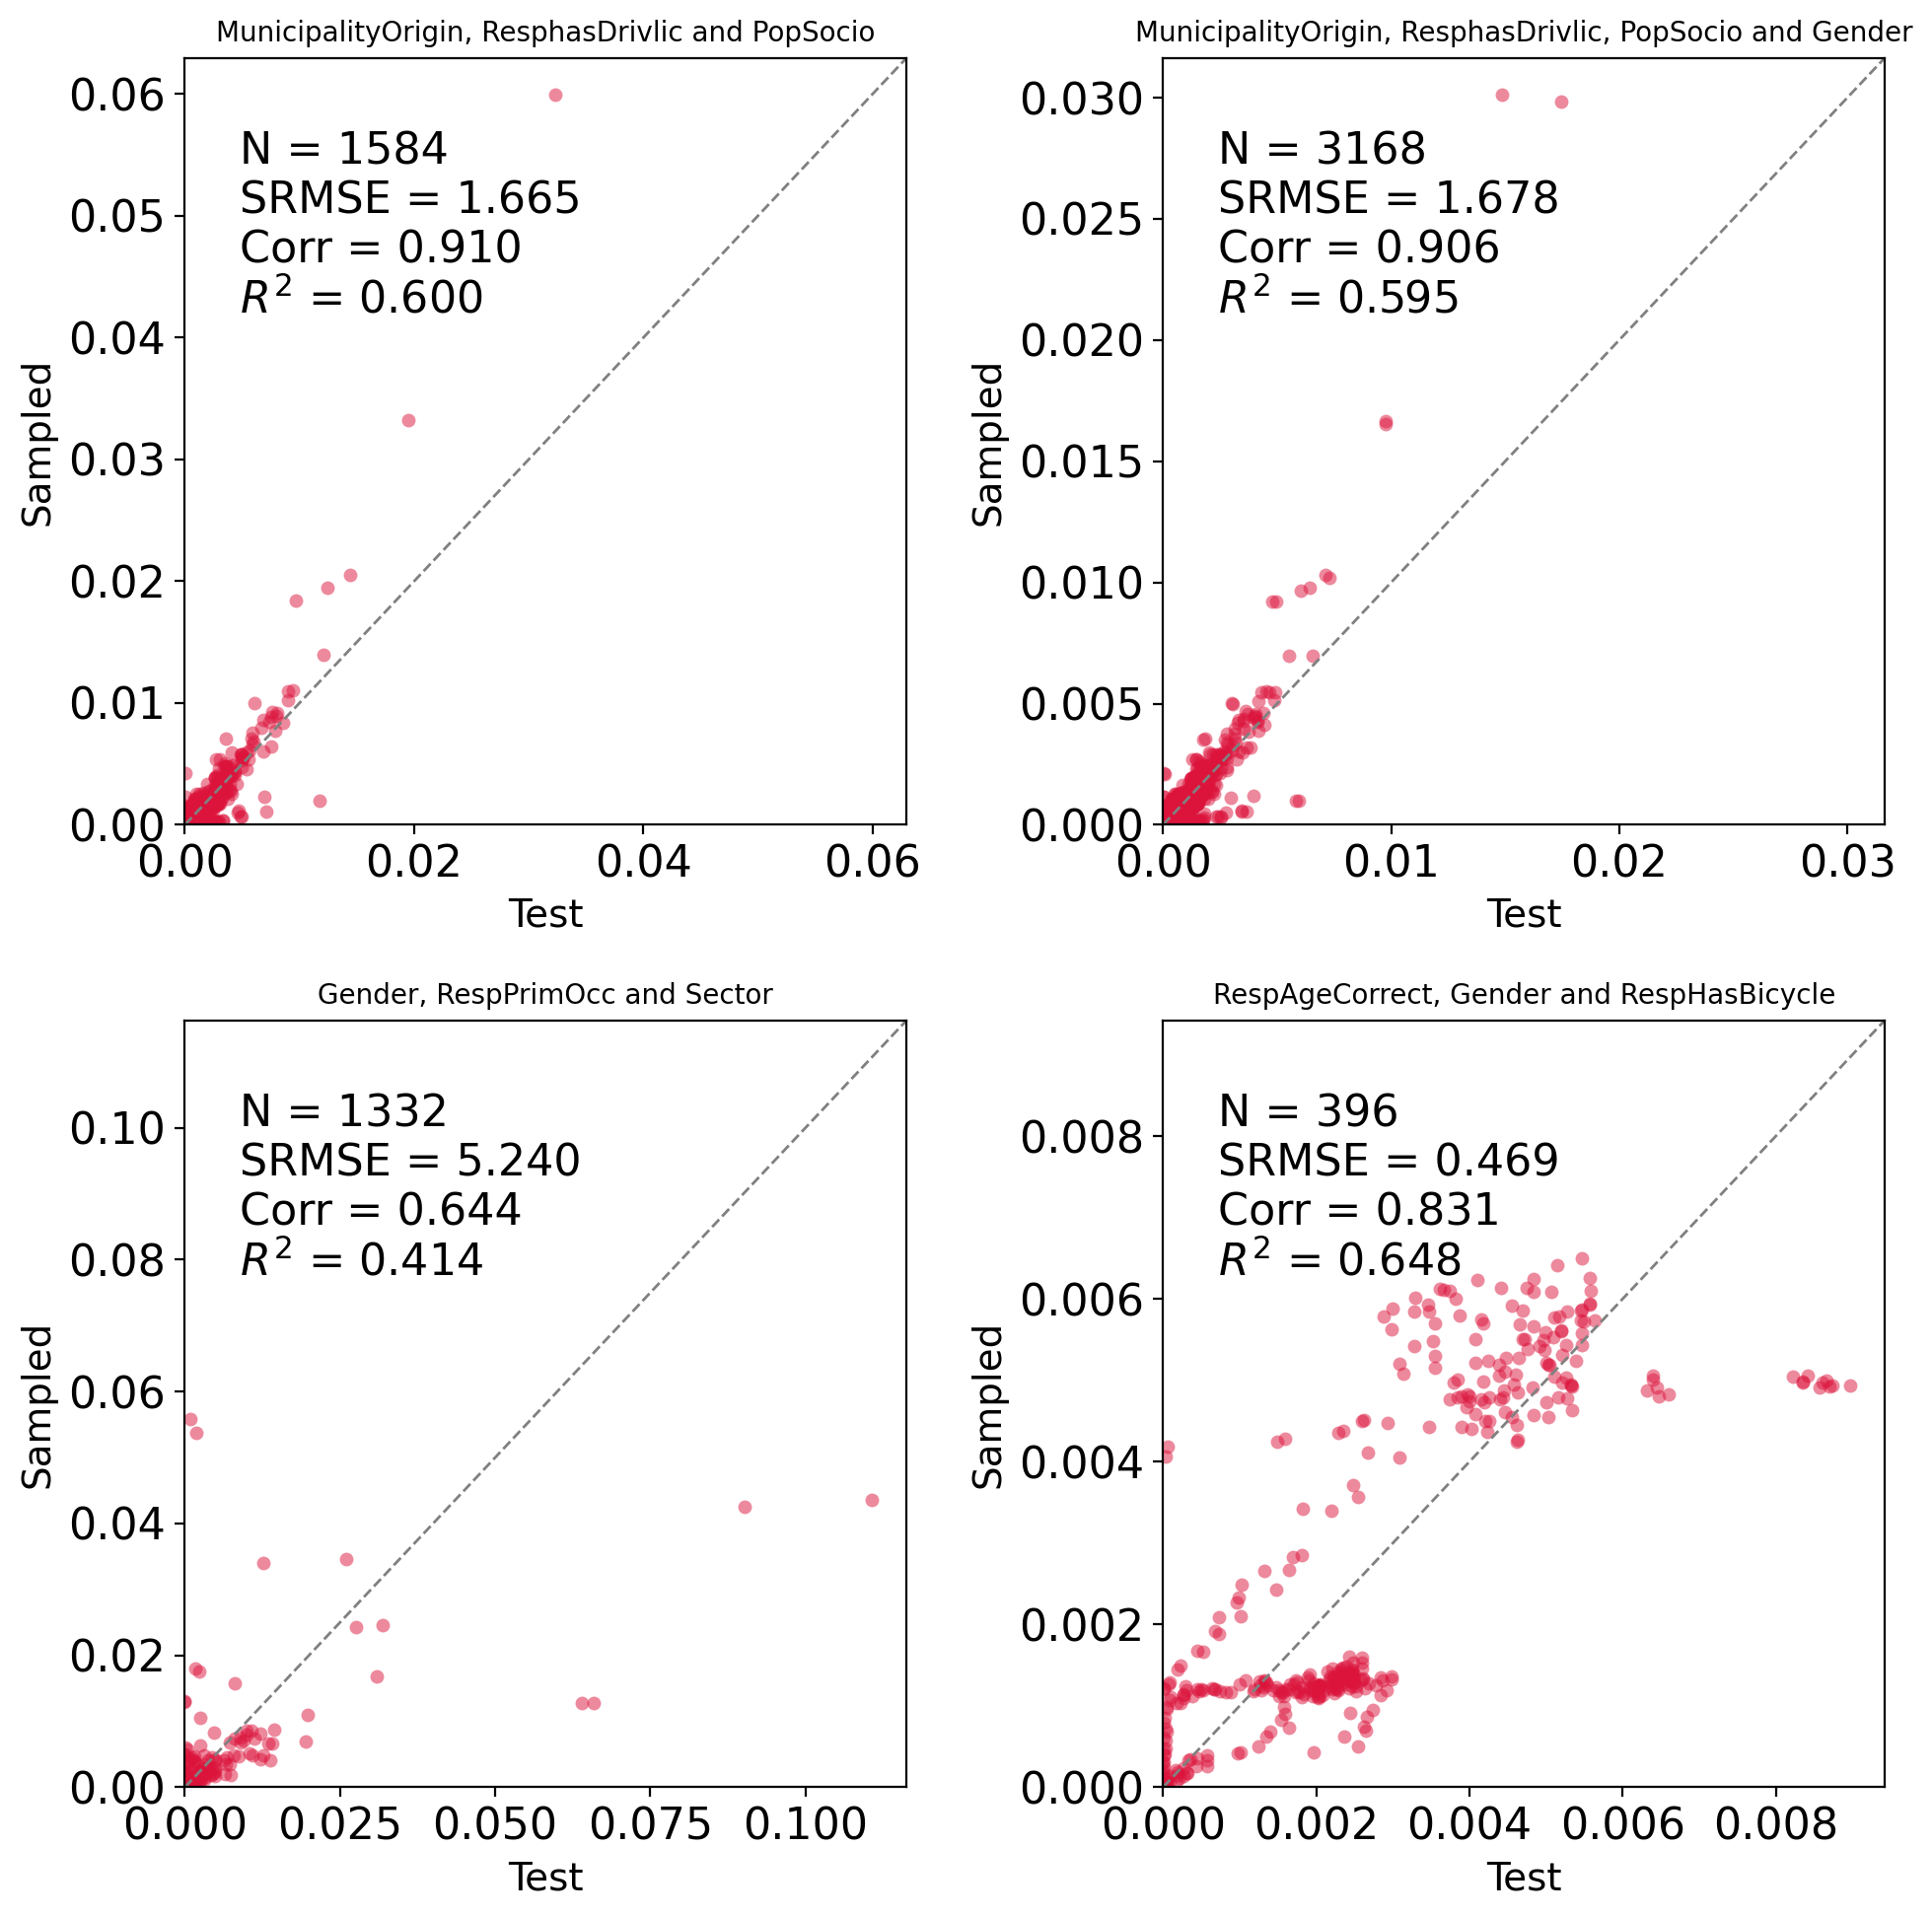

In [214]:
plotjoint(test, datgan, 'Results/datgan_pop_joint1_tu.png')

Aggregated variables: 
RespPrimOcc
ResphasDrivlic
Sector
Number of combinations: 2664
Aggregated variables: 
MunicipalityDest
ResphasDrivlic
Number of combinations: 400
Aggregated variables: 
RespPrimOcc
Sector
Number of combinations: 666
Aggregated variables: 
RespPrimOcc
Sector
Education
Number of combinations: 5328


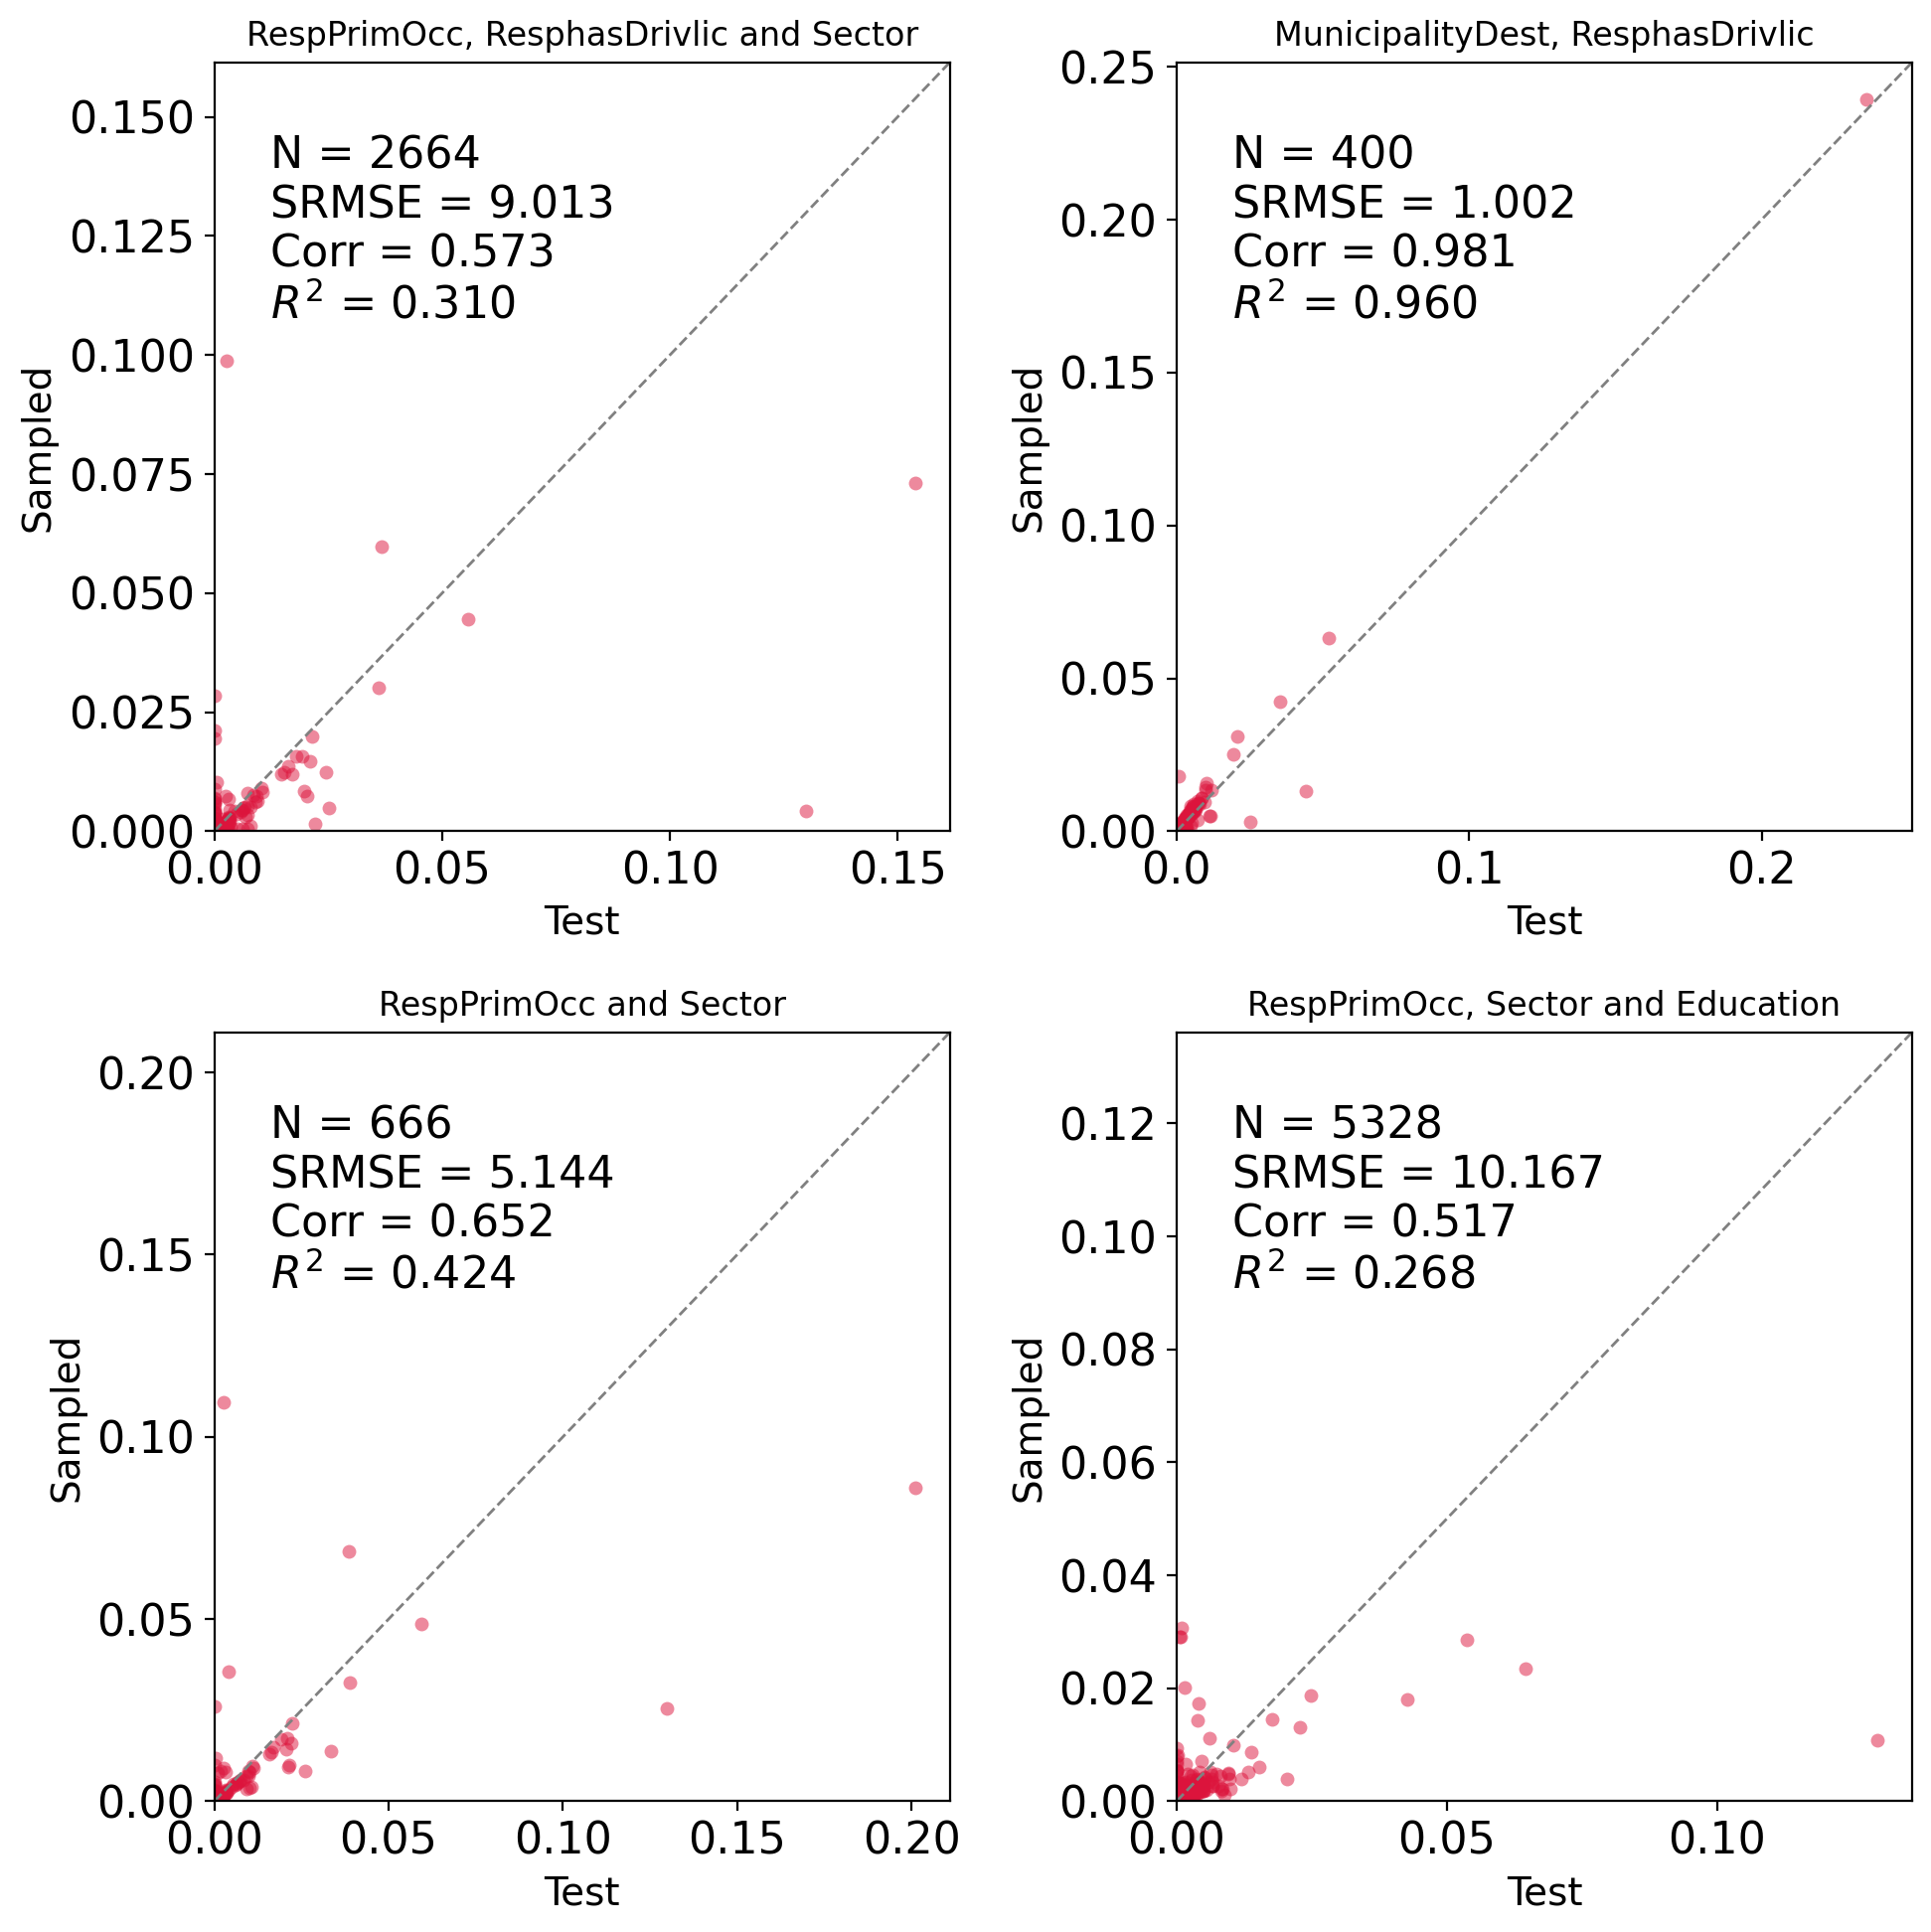

In [304]:
plotjoint2(test, datgan, 'Results/datgan_pop_joint2_tu.png')

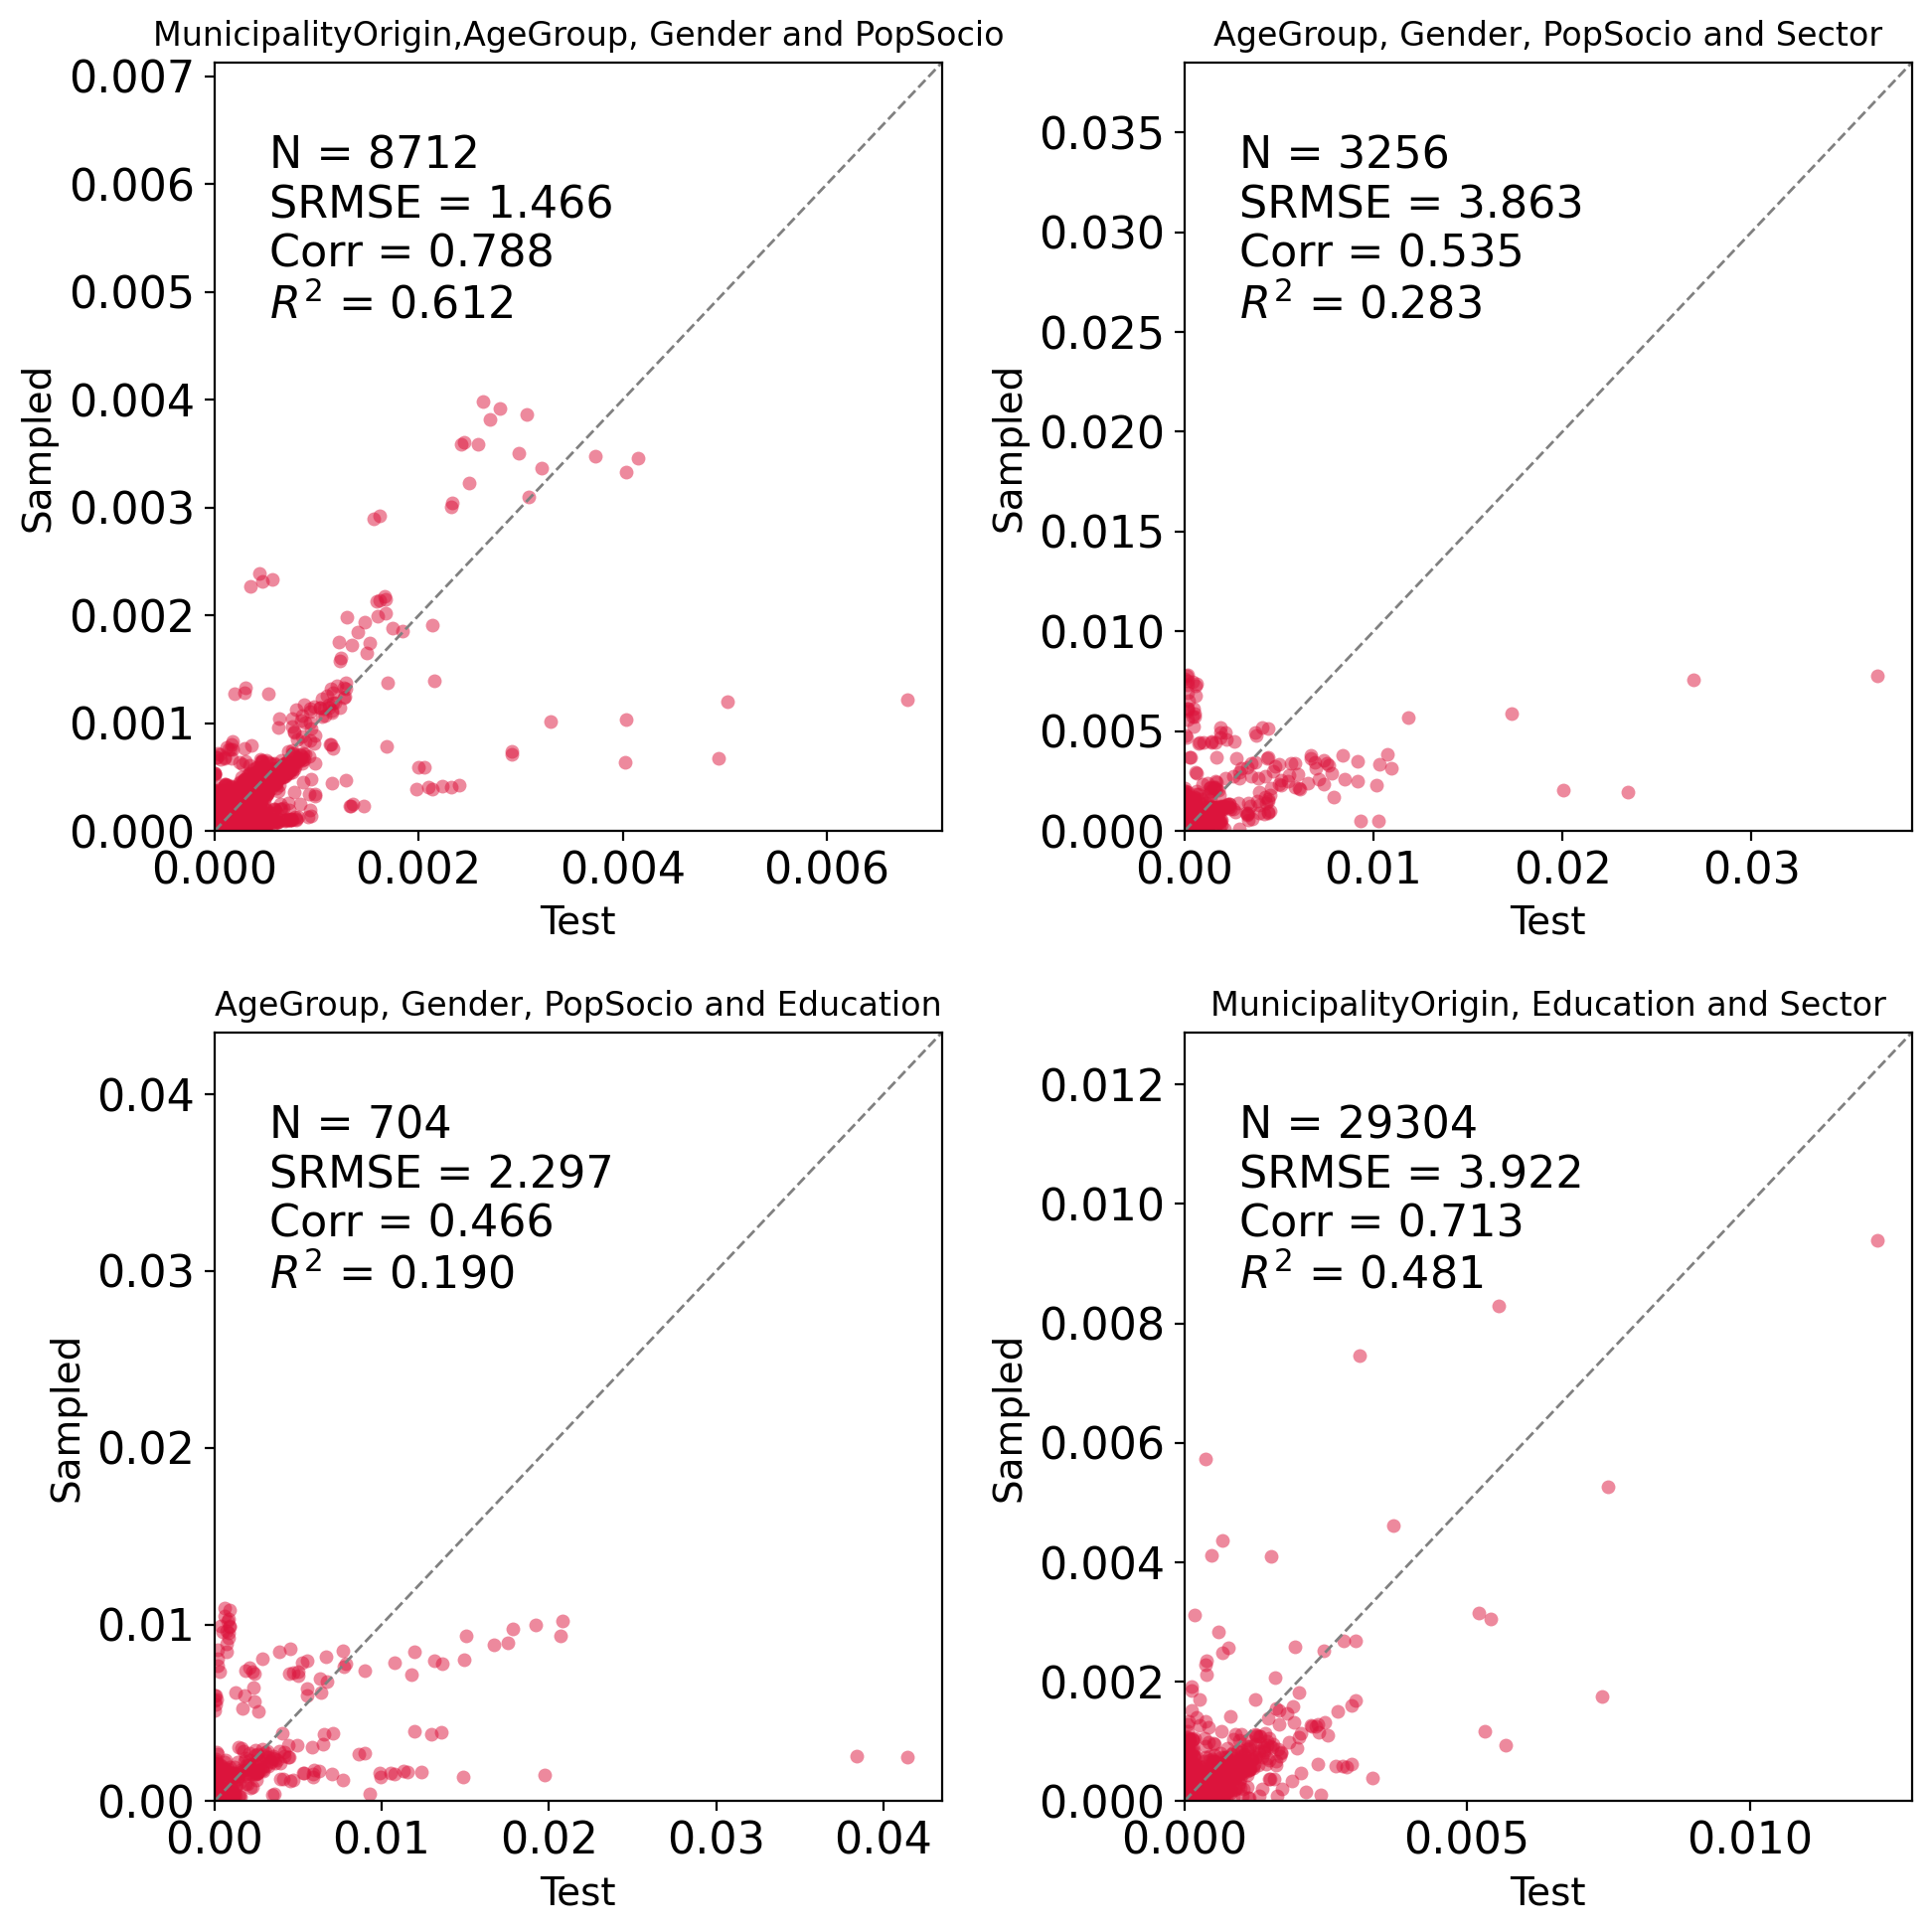

In [229]:
plotJointds(ds, datgan, 'Results/datgan_pop_joint_ds.png' )

In [ ]:
wgan_pop.

### funcitons

In [13]:
def validation(test, popFinal):
    real = test.copy()
    samples = popFinal.copy()
    
    stats = pd.DataFrame()
    for col in real.columns:
        print(col)
        if col != 'RespAgeCorrect':
            new = validationGAN.evaluateModel(real, samples, col)
            new['col'] = col
            new = pd.DataFrame([new])
            stats = pd.concat([stats, new]) 

    stats.set_index('col', inplace=True)
    return stats

In [181]:
def plotjoint(test_df, sampled_df, path):

    plt.rcParams['font.size'] = '16'

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

    categorical = ['MunicipalityOrigin', 'ResphasDrivlic', 'PopSocio']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    #plt.text(w * 0.08, w * 0.8, text)
    #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,0].text(w * 0.08, w * 0.7, text)
    axs[0,0].set_title('MunicipalityOrigin, ResphasDrivlic and PopSocio', fontsize=10)
    axs[0,0].set_xlabel('Test', fontsize=14)
    axs[0,0].set_ylabel('Sampled', fontsize=14)
    axs[0,0].axis([min_Y, max_Y, min_Y, max_Y])
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 

    categorical = ['MunicipalityOrigin', 'ResphasDrivlic', 'PopSocio', 'Gender']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    axs[0,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,1].text(w * 0.08, w * 0.7, text)
    axs[0,1].set_title('MunicipalityOrigin, ResphasDrivlic, PopSocio and Gender',fontsize=10)
    axs[0,1].set_xlabel('Test', fontsize=14)
    axs[0,1].set_ylabel('Sampled', fontsize=14)
    axs[0,1].axis([min_Y, max_Y, min_Y, max_Y])


    categorical = ['Gender','RespPrimOcc', 'Sector']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,0].text(w * 0.08, w * 0.7, text)
    axs[1,0].set_title('Gender, RespPrimOcc and Sector', fontsize=10)
    axs[1,0].set_xlabel('Test', fontsize=14)
    axs[1,0].set_ylabel('Sampled', fontsize=14)
    axs[1,0].axis([min_Y, max_Y, min_Y, max_Y])

    categorical = ['RespAgeCorrect','Gender', 'RespHasBicycle']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,1].text(w * 0.08, w * 0.7, text)
    axs[1,1].set_title('RespAgeCorrect, Gender and RespHasBicycle', fontsize=10)
    axs[1,1].set_xlabel('Test', fontsize=14)
    axs[1,1].set_ylabel('Sampled', fontsize=14)
    axs[1,1].axis([min_Y, max_Y, min_Y, max_Y])



    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)

In [182]:
def plotjoint2(test_df, sampled_df, path):

    #plt.rcParams['font.size'] = '16'

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

    categorical = ['RespPrimOcc', 'ResphasDrivlic', 'Sector']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    #plt.text(w * 0.08, w * 0.8, text)
    #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,0].text(w * 0.08, w * 0.7, text)
    axs[0,0].set_title('RespPrimOcc, ResphasDrivlic and Sector', fontsize=12)
    axs[0,0].set_xlabel('Test', fontsize=14)
    axs[0,0].set_ylabel('Sampled', fontsize=14)
    axs[0,0].axis([min_Y, max_Y, min_Y, max_Y])
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 

    categorical = ['MunicipalityDest', 'ResphasDrivlic']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
    axs[0,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,1].text(w * 0.08, w * 0.7, text)
    axs[0,1].set_title('MunicipalityDest, ResphasDrivlic',fontsize=12)
    axs[0,1].set_xlabel('Test', fontsize=14)
    axs[0,1].set_ylabel('Sampled', fontsize=14)
    axs[0,1].axis([min_Y, max_Y, min_Y, max_Y])


    categorical = ['RespPrimOcc', 'Sector']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05



    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,0].text(w * 0.08, w * 0.7, text)
    axs[1,0].set_title('RespPrimOcc and Sector', fontsize=12)
    axs[1,0].set_xlabel('Test', fontsize=14)
    axs[1,0].set_ylabel('Sampled', fontsize=14)
    axs[1,0].axis([min_Y, max_Y, min_Y, max_Y])

    categorical = ['RespPrimOcc', 'Sector', 'Education']
    df, stat = validationGAN.evaluate2(test_df, sampled_df, categorical, test_df)
    Y_test = df['count_real']
    Y_pred = df['count_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    N=1


    for var in categorical:
        N *= test_df[var].nunique() 


    text = ['N = ' + str(N),
        'SRMSE = {:.3f}'.format(stat['srmse']),
		        'Corr = {:.3f}'.format(stat['corr']),
		        '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)

    axs[1,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,1].text(w * 0.08, w * 0.7, text)
    axs[1,1].set_title('RespPrimOcc, Sector and Education', fontsize=12)
    axs[1,1].set_xlabel('Test', fontsize=14)
    axs[1,1].set_ylabel('Sampled', fontsize=14)
    axs[1,1].axis([min_Y, max_Y, min_Y, max_Y])



    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)

In [ ]:
def plotNum(df_test, df_samples, path):    
    plt.rcParams['font.size'] = '20'

    fig, axs = plt.subplots(1, 3, figsize=(25, 10), dpi=300, facecolor='w', edgecolor='k') 


    axs[0].hist(df_test['IncRespondent2000'].loc[(df_test['IncRespondent2000'] < 2000) &(df_test['IncRespondent2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[0].hist(df_samples['IncRespondent2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label='Sampled')
    axs[0].set_title('IncRespondent2000', fontsize=20)
    axs[0].set_xlabel('Income in .000 DKK', fontsize=20)
    axs[0].set_ylabel('', fontsize=12)
    #axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=12)
    #axs[0,2].set_yticklabels(axs[0,2].get_yticklabels(),  fontsize=12) 
    axs[0].grid(True)
    axs[0].legend()


    axs[1].hist(df_test['IncFamily2000'].loc[(df_test['IncFamily2000'] < 4000) &(df_test['IncFamily2000'] > -1)], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[1].hist(df_samples['IncFamily2000'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True, label ='Sampled')
    #axs[0,3].hist(df['Gender'].sort_values(), color='dodgerblue', alpha = 0.7, edgecolor='black', rwidth=1)
    axs[1].set_title('IncFamily2000', fontsize=20)
    axs[1].set_xlabel('Income in .000 DKK', fontsize=20)
    #axs[1].set_ylabel('Count', fontsize=12)
    #axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, fontsize=12)
    #axs[1,1].set_yticklabels(axs[0,3].get_yticklabels(),  fontsize=12) 
    axs[1].grid(True)
    axs[1].legend()

    axs[2].hist(df_test['RespAgeCorrect'], bins=50 ,color='dodgerblue', alpha = 0.4, edgecolor='black', density=True, label='Test set')
    axs[2].hist(df_samples['RespAgeCorrect'], bins=50 ,color='darkorange', alpha = 0.4, edgecolor='black', density=True,label ='Sampled')
    #axs[2,1].bar(df['Education'].value_counts() ,color='dodgerblue', alpha = 0.6, edgecolor='black')
    axs[2].set_title('RespAgeCorrect', fontsize=20)
    axs[2].set_xlabel('Age', fontsize=20)
    #axs[2].set_ylabel('Count', fontsize=12)
    #axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=0, fontsize=12)
    #axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(),  fontsize=12) 
    axs[2].grid(True)
    axs[2].legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    #fig.savefig(path)

In [228]:
def plotJointds(ds, pop, path):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k') 

    df_wgan_pop = pop.copy()

    attr = ['MunicipalityOrigin','AgeGroup', 'Gender', 'PopSocio']

    age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
    age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

    # Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
    df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
    df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
    df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
    df_wgan_pop = df_wgan_pop[attr]

    comb = df_wgan_pop.copy()

    ds_marg = ds.groupby(attr).Val.sum().reset_index()
    df_wgan_pop = df_wgan_pop.groupby(attr).size().reset_index()
    df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
    df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
    ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
    ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
    ds_marg['PopSocio']=ds_marg['PopSocio'].astype(str).astype('category')
    ds_marg['Gender']=ds_marg['Gender'].astype(str).astype('category')
    #ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
    real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=attr, how='outer', indicator=True)
    real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
    real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

    Y_test = real_and_sampled['Val_real']
    Y_pred = real_and_sampled['Val_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

    N=1


    for var in attr:
        N *=comb[var].nunique() 


    text = ['N = ' + str(N),
            'SRMSE = {:.3f}'.format(stat['srmse']),
                    'Corr = {:.3f}'.format(stat['corr']),
                    '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
        #plt.text(w * 0.08, w * 0.8, text)
        #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
        #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
        #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,0].text(w * 0.08, w * 0.7, text)
    axs[0,0].set_title('MunicipalityOrigin, AgeGroup, Gender and PopSocio', fontsize=12)
    axs[0,0].set_xlabel('Test', fontsize=14)
    axs[0,0].set_ylabel('Sampled', fontsize=14)
    axs[0,0].axis([min_Y, max_Y, min_Y, max_Y])

    df_wgan_pop = pop.copy()

    attr = ['AgeGroup', 'Gender', 'PopSocio','Sector']

    age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
    age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

    # Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
    df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
    df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
    df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
    df_wgan_pop = df_wgan_pop[attr]

    comb = df_wgan_pop.copy()

    ds_marg = ds.groupby(attr).Val.sum().reset_index()
    df_wgan_pop = df_wgan_pop.groupby(attr).size().reset_index()
    df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
    df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
    ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
    #ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
    ds_marg['PopSocio']=ds_marg['PopSocio'].astype(str).astype('category')
    ds_marg['Gender']=ds_marg['Gender'].astype(str).astype('category')
    #ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
    real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=attr, how='outer', indicator=True)
    real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
    real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

    Y_test = real_and_sampled['Val_real']
    Y_pred = real_and_sampled['Val_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

    N=1


    for var in attr:
        N *=comb[var].nunique() 


    text = ['N = ' + str(N),
            'SRMSE = {:.3f}'.format(stat['srmse']),
                    'Corr = {:.3f}'.format(stat['corr']),
                    '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
        #plt.text(w * 0.08, w * 0.8, text)
        #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
        #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
        #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[0,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[0,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[0,1].text(w * 0.08, w * 0.7, text)
    axs[0,1].set_title('AgeGroup, Gender, PopSocio and Sector', fontsize=12)
    axs[0,1].set_xlabel('Test', fontsize=14)
    axs[0,1].set_ylabel('Sampled', fontsize=14)
    axs[0,1].axis([min_Y, max_Y, min_Y, max_Y])

    
    df_wgan_pop = pop.copy()

    attr = ['AgeGroup', 'Gender', 'PopSocio','Education']

    age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
    age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

    # Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
    df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
    df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
    df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
    df_wgan_pop = df_wgan_pop[attr]

    comb = df_wgan_pop.copy()

    ds_marg = ds.groupby(attr).Val.sum().reset_index()
    df_wgan_pop = df_wgan_pop.groupby(attr).size().reset_index()
    df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
    df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
    ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
    #ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
    ds_marg['PopSocio']=ds_marg['PopSocio'].astype(str).astype('category')
    ds_marg['Gender']=ds_marg['Gender'].astype(str).astype('category')
    ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
    real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=attr, how='outer', indicator=True)
    real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
    real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

    Y_test = real_and_sampled['Val_real']
    Y_pred = real_and_sampled['Val_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

    N=1


    for var in attr:
        N *=comb[var].nunique() 


    text = ['N = ' + str(N),
            'SRMSE = {:.3f}'.format(stat['srmse']),
                    'Corr = {:.3f}'.format(stat['corr']),
                    '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
        #plt.text(w * 0.08, w * 0.8, text)
        #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
        #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
        #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[1,0].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,0].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,0].text(w * 0.08, w * 0.7, text)
    axs[1,0].set_title('AgeGroup, Gender, PopSocio and Education', fontsize=12)
    axs[1,0].set_xlabel('Test', fontsize=14)
    axs[1,0].set_ylabel('Sampled', fontsize=14)
    axs[1,0].axis([min_Y, max_Y, min_Y, max_Y])
    
    
    df_wgan_pop = pop.copy()

    attr = ['MunicipalityOrigin', 'Education','Sector']

    age_bins = [-1, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 200]
    age_cats = ['under 15 years', '15-19', '20-24', '25-29', '30-34', '35-39',
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', 'over 69 years']

    # Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
    df_wgan_pop['AgeGroup'] = pd.cut(df_wgan_pop.RespAgeCorrect, age_bins, labels=age_cats)
    df_wgan_pop = df_wgan_pop.loc[~df_wgan_pop.AgeGroup.isin(['over 69 years', 'under 15 years'])]
    df_wgan_pop.AgeGroup = df_wgan_pop.AgeGroup.cat.remove_categories(['over 69 years', 'under 15 years'])
    df_wgan_pop = df_wgan_pop[attr]

    comb = df_wgan_pop.copy()

    ds_marg = ds.groupby(attr).Val.sum().reset_index()
    df_wgan_pop = df_wgan_pop.groupby(attr).size().reset_index()
    df_wgan_pop = df_wgan_pop.rename(columns={0:'Val'})
    df_wgan_pop['Val'] = df_wgan_pop['Val']/df_wgan_pop['Val'].sum()
    ds_marg['Val'] = ds_marg['Val']/ds_marg['Val'].sum()
    #ds_marg['AgeGroup']= ds_marg['AgeGroup'].astype('category')
    ds_marg['MunicipalityOrigin']= ds_marg['MunicipalityOrigin'].astype('category')
    #ds_marg['PopSocio']=ds_marg['PopSocio'].astype(str).astype('category')
    #ds_marg['Gender']=ds_marg['Gender'].astype(str).astype('category')
    #ds_marg['Education'] = ds_marg['Education'].astype('category')

    ##### Merge and difference
    real_and_sampled = pd.merge(ds_marg, df_wgan_pop, suffixes=['_real', '_sampled'], on=attr, how='outer', indicator=True)
    real_and_sampled = real_and_sampled[['Val_real', 'Val_sampled']].fillna(0)
    real_and_sampled['diff'] = real_and_sampled.Val_real-real_and_sampled.Val_sampled
    
    #plt.rcParams['font.size'] = '16'

    Y_test = real_and_sampled['Val_real']
    Y_pred = real_and_sampled['Val_sampled']

    min_Y = min([min(Y_test),min(Y_pred)])
    max_Y = max([max(Y_test),max(Y_pred)])
    w = max_Y - min_Y
    max_Y += w * 0.05

    stat = plotUtils.compute_stat(Y_test, Y_pred, do_plot=False, plot_log=False)

    N=1


    for var in attr:
        N *=comb[var].nunique() 


    text = ['N = ' + str(N),
            'SRMSE = {:.3f}'.format(stat['srmse']),
                    'Corr = {:.3f}'.format(stat['corr']),
                    '$R^2$ = {:.3f}'.format(stat['r2'])]
    text = '\n'.join(text)
        #plt.text(w * 0.08, w * 0.8, text)
        #plt.plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
        #plt.plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
        #plt.axis([min_Y, max_Y, min_Y, max_Y])

    axs[1,1].plot(Y_test, Y_pred, '.', alpha=0.5, ms=10, color='crimson', markeredgewidth=0)
    axs[1,1].plot([min_Y, max_Y], [min_Y, max_Y], ls='--', color='gray', linewidth=1.0)
    axs[1,1].text(w * 0.08, w * 0.7, text)
    axs[1,1].set_title('MunicipalityOrigin, Education and Sector', fontsize=12)
    axs[1,1].set_xlabel('Test', fontsize=14)
    axs[1,1].set_ylabel('Sampled', fontsize=14)
    axs[1,1].axis([min_Y, max_Y, min_Y, max_Y])


    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

    fig.savefig(path)
